<h1 style="color:darkblue">Titanic: Passenger Survival Prediction</h1>

<h2 style="color:steelblue">1.Introduction</h2>

<p style="font-size:16px">
The Titanic disaster of 1912, one of the most infamous maritime tragedies, claimed over 1,500 lives due to insufficient lifeboats and complex social dynamics.
Despite its historical context, the Titanic dataset remains a powerful case study for predictive modeling.
By analyzing passenger demographics and travel details, we can uncover survival patterns and build models that simulate real-world decision-making, such as prioritizing rescue efforts or assessing risks in critical scenarios.
This project leverages data mining techniques to predict passenger survival, offering insights applicable to modern risk management and operational planning.
</p>

<h2 style="color:steelblue">2.Problem Statement</h2>

<p style="font-size:16px">
This project aims to develop a predictive model to estimate the survival probability of Titanic passengers based on their demographic and travel-related attributes.
The task is a classic <b>binary classification problem</b>, where the goal is to predict whether a passenger <b>survived (1)</b> or <b>did not survive (0)</b> during the disaster.
</p>

<p style="font-size:16px">
While the Titanic event is historical, the modeling approach mirrors real-world applications.
For example, similar techniques can prioritize rescue operations in natural disasters, predict patient outcomes in medical emergencies, or identify at-risk customers in business retention strategies.
By analyzing survival factors, this project not only uncovers historical patterns but also demonstrates the power of data-driven decision-making in high-stakes scenarios.
</p>

<h2 style="color:steelblue">3. Research Objectives</h2>

<ol style="font-size:16px">
  <li>To identify and evaluate the key features influencing passenger survival, such as sex, passenger class, age, and family size, using statistical analysis and feature importance scores.</li>
  <li>To construct and compare multiple supervised classification models—including logistic regression, decision trees, and ensemble techniques like random forests and XGBoost—in order to identify the most effective algorithm.</li>
  <li>To explore survival patterns through data visualization techniques, aiming to uncover meaningful insights that may inform future decision-making or operational strategies.</li>
  <li>To assess the generalization capability of the final selected model using a hold-out test set, and to quantify its performance using evaluation metrics such as accuracy, F1-score, precision-recall curves, and ROC AUC.</li>
</ol>


<h2 style="color:steelblue">4. Dataset Description</h2>

<p style="font-size:16px">
The Titanic dataset, provided by Kaggle, contains data on passengers who were aboard the Titanic. The dataset is split into a training set (<code>train.csv</code>) and a test set (<code>test.csv</code>), each containing information about the passengers such as age, sex, class, fare, and other demographic or travel-related attributes.
</p>

<p style="font-size:16px">
The <b>training set</b> includes 891 records and is used to train and validate machine learning models. It also contains the target variable <code>Survived</code>, which indicates whether the passenger survived (1) or not (0).
</p>

<p style="font-size:16px">
The <b>test set</b> includes 418 records and is used for making final survival predictions after the model has been trained. It does not contain the <code>Survived</code> column.
</p>

<p style="font-size:16px">
The combined use of these two files (<code>train.csv</code> and <code>test.csv</code>) enables a complete machine learning workflow, including model training, prediction, and performance assessment through metrics such as accuracy, precision, recall, F1-score, and ROC AUC.
</p>

<p style="font-size:16px">
Below is a brief description of some key features in the dataset:
</p>

<ul style="font-size:16px">
  <li><b>PassengerId</b>: Unique identifier for each passenger</li>
  <li><b>Survived</b>: Whether the passenger is alive: 0 indicates not alive, 1 indicates alive</li>
  <li><b>Pclass</b>: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)</li>
  <li><b>Name</b>: Passenger name (includes title)</li>
  <li><b>Sex</b>: Gender</li>
  <li><b>Age</b>: Age in years (may contain missing values)</li>
  <li><b>SibSp</b>: Number of siblings/spouses aboard</li>
  <li><b>Parch</b>: Number of parents/children aboard</li>
  <li><b>Ticket</b>: Ticket number</li>
  <li><b>Fare</b>: Ticket fare</li>
  <li><b>Cabin</b>: Cabin number (many missing)</li>
  <li><b>Embarked</b>: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)</li>
</ul>


<h1 style="color:#00008B">Part1: Data Preprocessing Research Methodology</h1>

<p style="font-size:16px">
Data preprocessing is an essential step in the data mining process, aiming to provide high-quality data for subsequent modeling and analysis through cleaning, transformation, and feature engineering. The preprocessing phase in this project includes the following steps:
</p>

<h2 style="color:#4682B4">1. Data Exploration and Missing Value Analysis</h2>
<p style="font-size:16px">
I first loaded and merged the training and test datasets to facilitate unified processing. Then, I conducted an initial data exploration, including reviewing basic data information, statistical summaries, and missing value analysis. The missing value situation was visualized using the Missingno library. The main findings regarding missing values are as follows:
</p>
<ul style="font-size:16px">
  <li>The <code>Cabin</code> feature has a large number of missing values (approximately 77.46%), which will be handled later through feature engineering.</li>
  <li>The <code>Age</code> feature has about 20.09% missing values.</li>
  <li>The <code>Embarked</code> feature has a very small amount of missing values (approximately 0.15%).</li>
  <li>The <code>Fare</code> feature in the test set has a very small amount of missing values (approximately 0.07%).</li>
</ul>

<h2 style="color:#4682B4">2. Data Visualization Analysis</h2>
<p style="font-size:16px">
Through multi-dimensional data visualization analysis, I explored the relationship between different features and passenger survival. The specific analysis includes:
</p>
<ul style="font-size:16px">
  <li><b>Survival Analysis</b>: The overall survival rate is 38.4%, with females having a significantly higher survival rate (74.2%) compared to males (18.9%).</li>
  <li><b>Passenger Class Analysis</b>: The survival rate for first-class passengers (62.9%) is significantly higher than that for second-class (47.3%) and third-class (24.2%) passengers.</li>
  <li><b>Age and Fare Distribution</b>: The age distribution is concentrated around 20–30 years, and the fare distribution is right-skewed with some extremely high fares.</li>
  <li><b>Embarked Port Analysis</b>: Most passengers embarked from Southampton (S).</li>
</ul>

<h2 style="color:#4682B4">3. Missing Value Handling</h2>
<p style="font-size:16px">
For different features with missing values, I employed the following strategies for imputation:
</p>
<ul style="font-size:16px">
  <li><code>Age</code>: Filled missing values with the median based on gender and passenger class grouping.</li>
  <li><code>Fare</code>: Filled missing values with the median within each passenger class.</li>
  <li><code>Embarked</code>: Filled missing values using the mode.</li>
  <li><code>Cabin</code>: Due to the high missing percentage, I created a binary indicator variable <code>Has_Cabin</code> to denote whether the passenger had a cabin, and extracted the first letter of the cabin (<code>CabinLetter</code>) to denote the deck. Missing cabin information was marked as <code>"U"</code> for unknown.</li>
</ul>

<h2 style="color:#4682B4">4. Outlier Detection and Handling (Fare Feature)</h2>
<p style="font-size:16px">
I conducted an in-depth outlier detection on the <code>Fare</code> feature, employing the percentile method (1%-95%) to determine outlier thresholds. I also inspected and addressed negative fare values by replacing them with the median fare of the corresponding passenger class. Key outcomes from this analysis include:
</p>
<ul style="font-size:16px">
  <li>Identified and corrected negative fare values, ensuring data validity.</li>
  <li>Established the fare outlier boundaries using the 1st percentile (lower bound) and the 95th percentile (upper bound).</li>
  <li>Detected approximately 5% of data points as fare outliers, predominantly high-value fares associated with first-class passengers.</li>
  <li>Visualized fare distributions and found that passengers with higher fare values had significantly higher survival rates, highlighting fare as a meaningful predictor for survival.</li>
</ul>

<h2 style="color:#4682B4">5. Feature Engineering</h2>
<p style="font-size:16px">
To improve the predictive performance of the model, I performed extensive feature engineering, including:
</p>
<ul style="font-size:16px">
  <li>Extracted titles (e.g., Mr, Miss, Mrs, Master) from the <code>Name</code> feature and combined rare titles into a single category (<code>Rare</code>).</li>
  <li>Extracted the first letter of the <code>Cabin</code> to indicate the deck, which helps capture survival probability differences.</li>
  <li>Created the <code>FamilySize</code> and <code>IsAlone</code> features to reflect family composition and travel dynamics.</li>
  <li>Grouped <code>Age</code> and <code>Fare</code> into <code>AgeGroup</code> and <code>FareGroup</code> to clearly identify the influence of different age groups and fare levels on survival.</li>
</ul>

<h2 style="color:#4682B4">6. Feature Encoding</h2>
<p style="font-size:16px">
I converted all categorical variables into numeric variables suitable for modeling:
</p>
<ul style="font-size:16px">
  <li><code>Sex</code>: Males are coded as 0, females as 1.</li>
  <li><code>Embarked</code>: Southampton (S)=0, Cherbourg (C)=1, Queenstown (Q)=2.</li>
  <li><code>Title</code>: Mr(1), Miss(2), Mrs(3), Master(4), Rare(5).</li>
  <li><code>AgeGroup</code>: Child(0), Teenager(1), Young(2), Adult(3), Elderly(4).</li>
  <li><code>FareGroup</code>: Low(0), Medium(1), High(2), Very High(3).</li>
  <li><code>CabinLetter</code>: Encoded numerically.</li>
</ul>

<h2 style="color:#4682B4">7. Feature Correlation Analysis</h2>
<p style="font-size:16px">
Using correlation heatmaps and feature-to-survival correlation analysis, the following influential features were identified:
</p>
<ul style="font-size:16px">
  <li><code>Sex</code> as the strongest predictor, followed by <code>Pclass</code>.</li>
  <li><code>Title</code>, <code>FamilySize</code>, <code>CabinLetter</code>, <code>AgeGroup</code>, and <code>FareGroup</code> also significantly correlated with survival.</li>
</ul>

<h2 style="color:#4682B4">8. Data Export and Storage</h2>

<p style="font-size:16px">
After preprocessing, unnecessary features were removed to reduce noise and simplify the model. Specifically, the following variables were excluded:
</p>

<ul style="font-size:16px">
  <li><code>PassengerId</code>: Merely a unique identifier with no predictive value.</li>
  <li><code>Name</code>: Although it contains some embedded information (e.g., titles), these were already extracted into a separate <code>Title</code> feature during feature engineering.</li>
  <li><code>Ticket</code>: This field contains irregular alphanumeric strings with no clear structure or correlation to survival. Feature extraction from this field is complex and not guaranteed to add value.</li>
  <li><code>Cabin</code>: Over 75% of entries are missing. Although potentially informative, the sparsity significantly limits its utility without complex imputation or assumptions.</li>
</ul>

<p style="font-size:16px">
The cleaned and engineered datasets were saved as <code>train_processed.csv</code> and <code>test_processed.csv</code> for use in modeling. These selections improved data quality and modeling efficiency by focusing on the most informative and reliable features.
</p>



Training set size: (891, 12), Testing set size: (418, 12), Combined data size: (1309, 12)

Basic Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3    

<Figure size 1200x600 with 0 Axes>

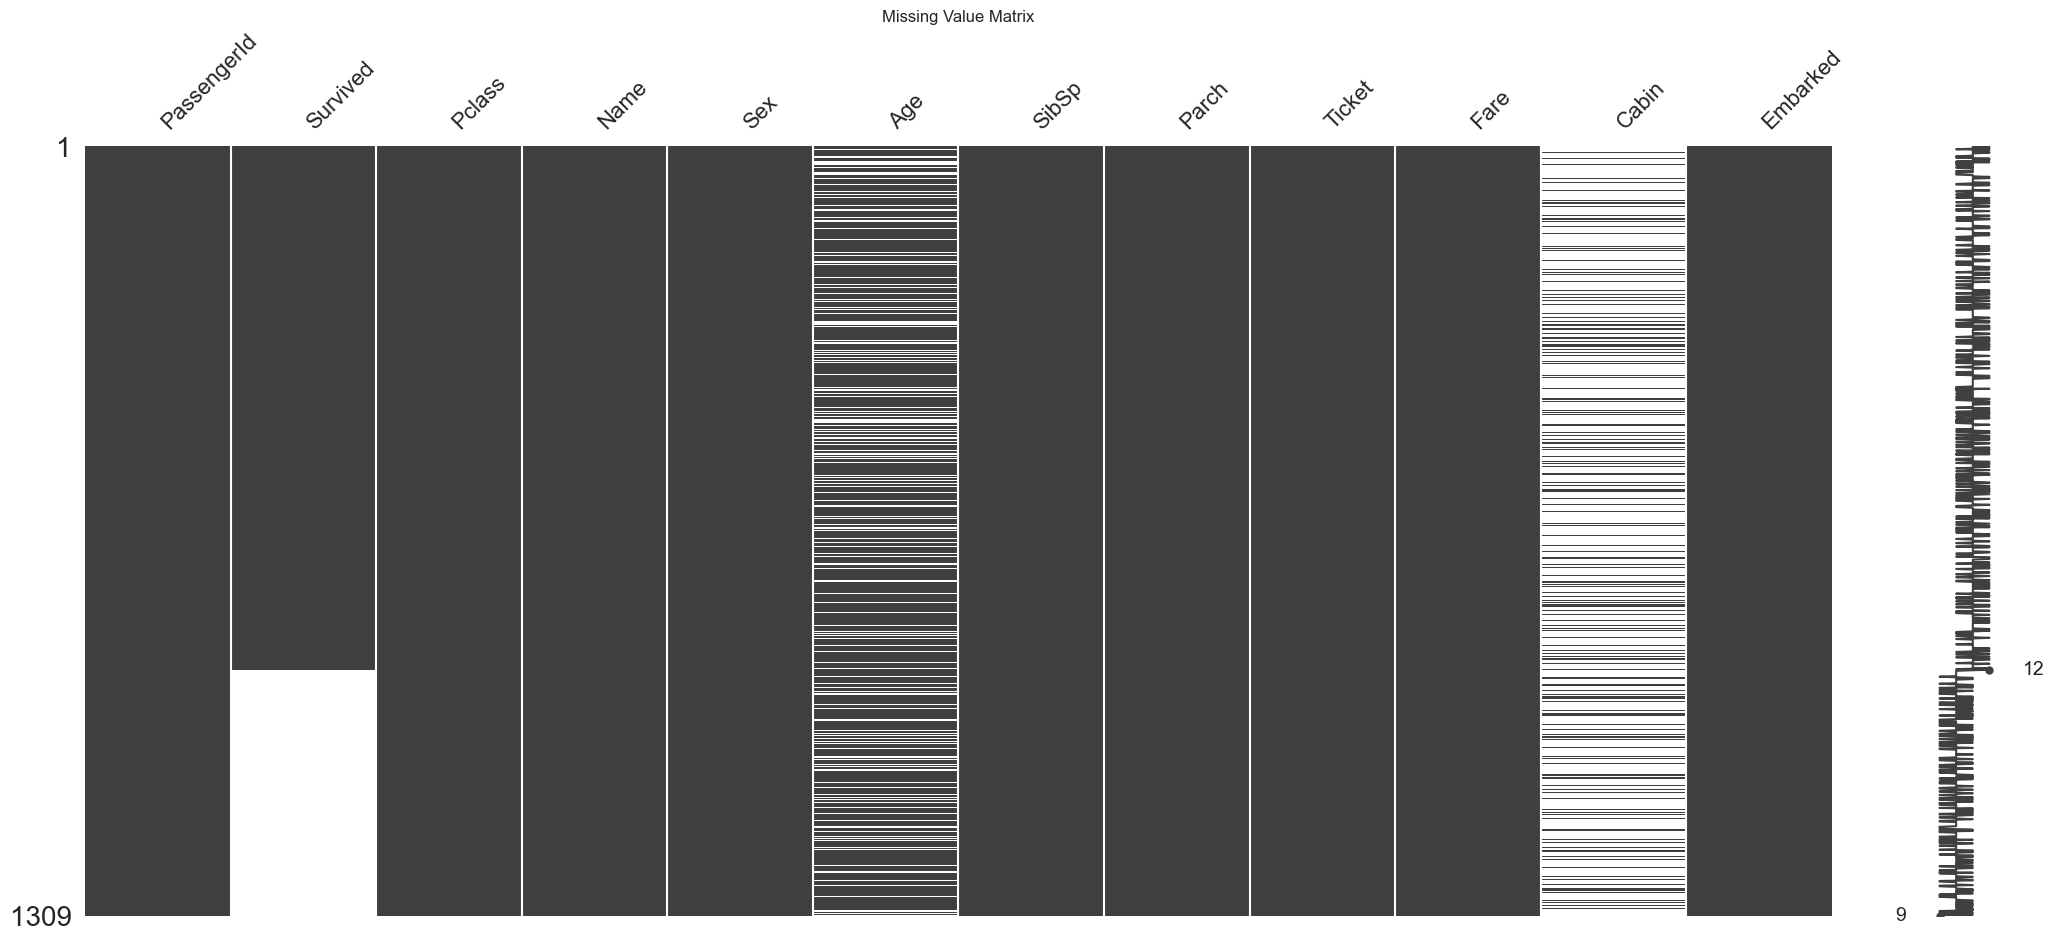


【Missing Value Analysis Summary】
1. Cabin feature has 1014 missing values, about 77.46%
2. Missing values in Survived feature are normal due to merged training and test sets, equal to the test data count
3. Age feature has 263 missing values, about 20.09%
4. Embarked feature has 2 missing values, about 0.15%
5. Test set has 1 missing Fare value, about 0.07%


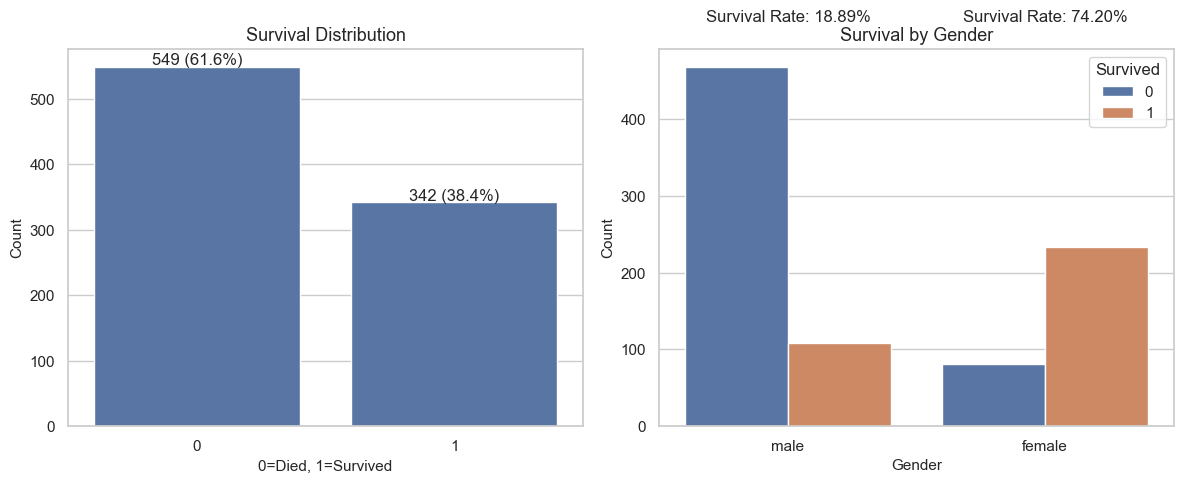

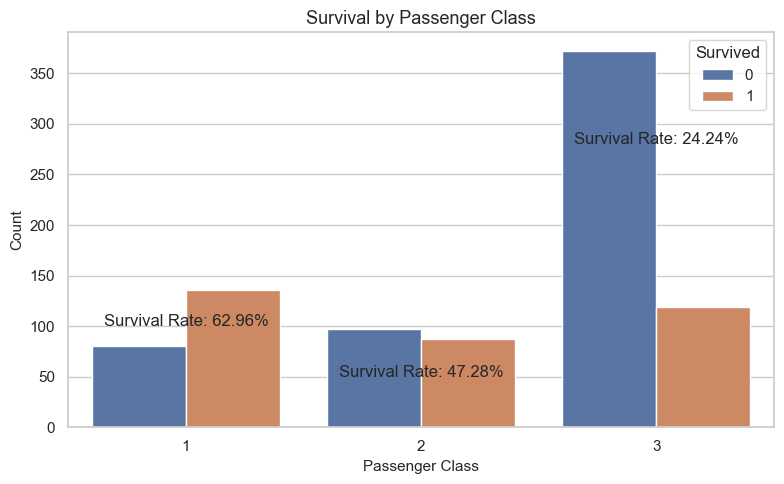

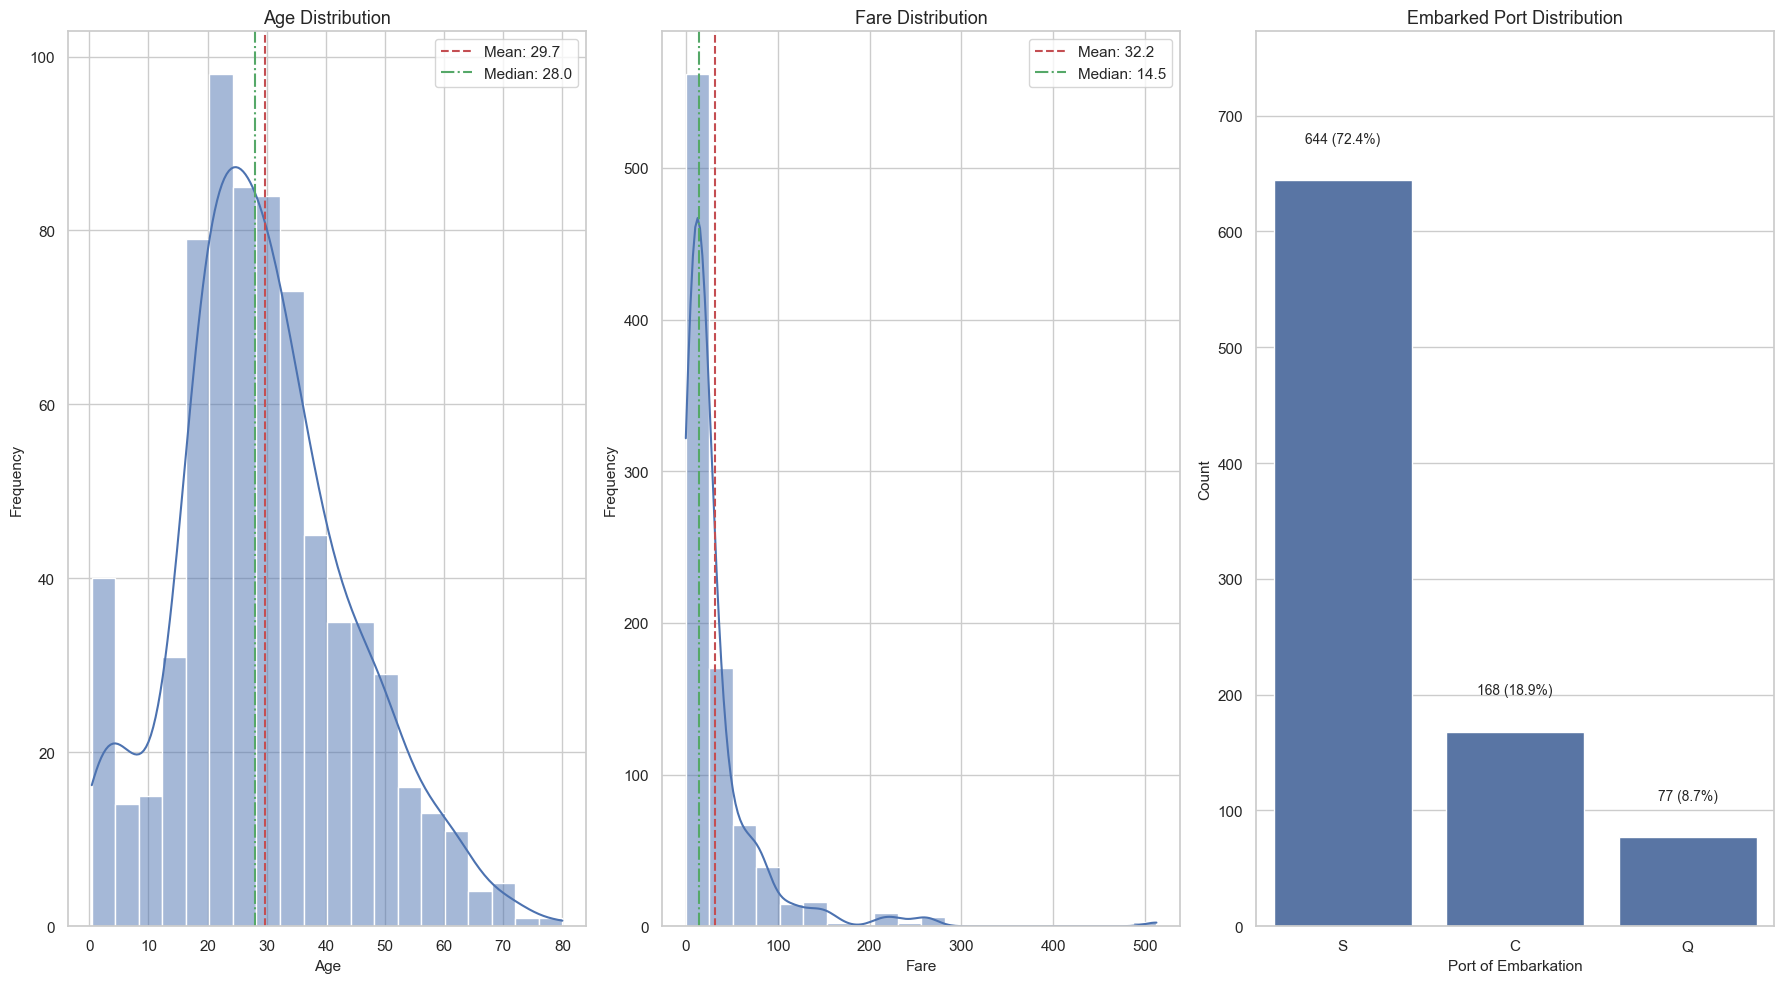


【Basic Visualization Analysis Summary】
1. Survival Rate: About 38.4% passengers survived, 61.6% perished
2. Gender: Female survival rate (74.2%) much higher than male (18.9%)
3. Passenger Class: First class survival rate (62.9%) > Second class (47.3%) > Third class (24.2%)
4. Age: Median passenger age about 28, mean about 30
5. Fare: Right-skewed distribution, most passengers paid lower fares, with a few high-priced tickets and one extremely high fare
6. Embarkation Port: Majority boarded at Southampton(S) (72.4%), followed by Cherbourg(C) (18.9%), and fewest from Queenstown(Q) (8.7%)

Missing values after treatment:
Survived     418
Cabin       1014
dtype: int64

【Fare Outlier Detection and Treatment】
Found 0 negative fare records!
All negative fares successfully processed.


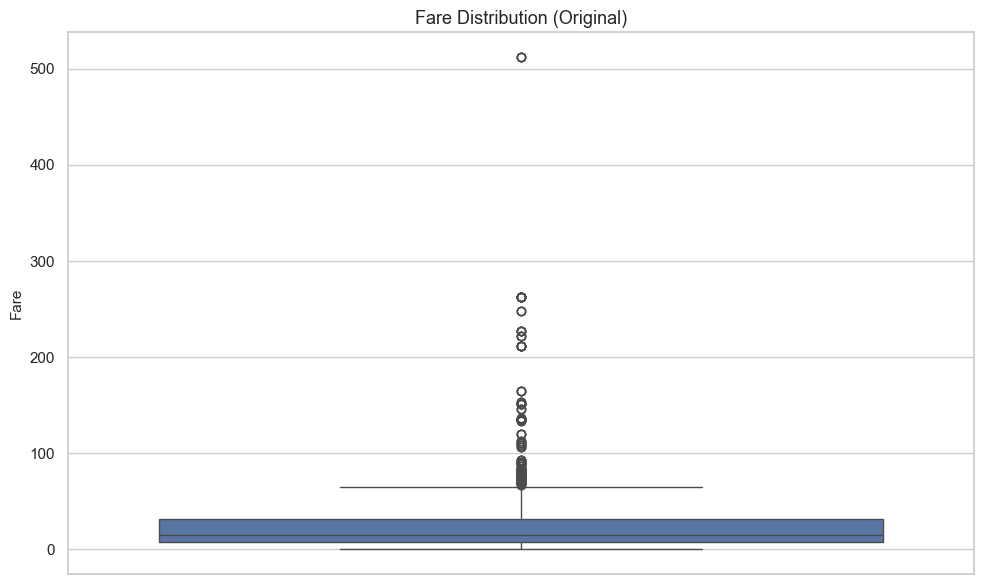

Fare lower bound (1th percentile): 0.00, upper bound (95th percentile): 133.65
Detected 65 outliers (4.97% of data)

Basic statistics of outlier fares:
count     65.000000
mean     216.790835
std       89.849956
min      134.500000
25%      151.550000
50%      211.500000
75%      262.375000
max      512.329200
Name: Fare, dtype: float64

Passenger class distribution for high fare outliers:
Pclass
1    65
Name: count, dtype: int64


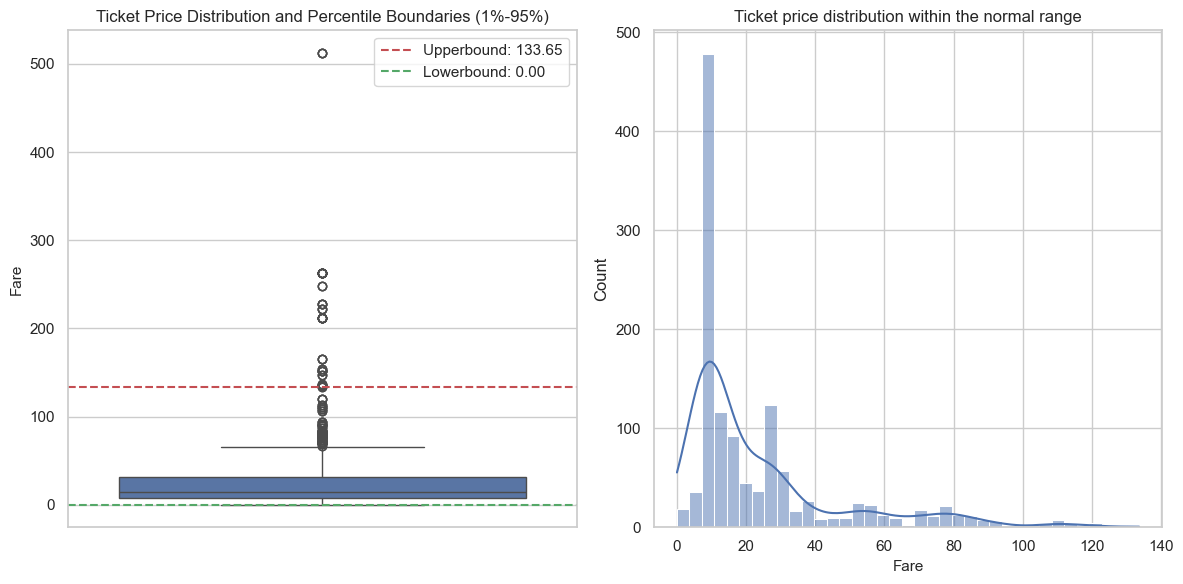

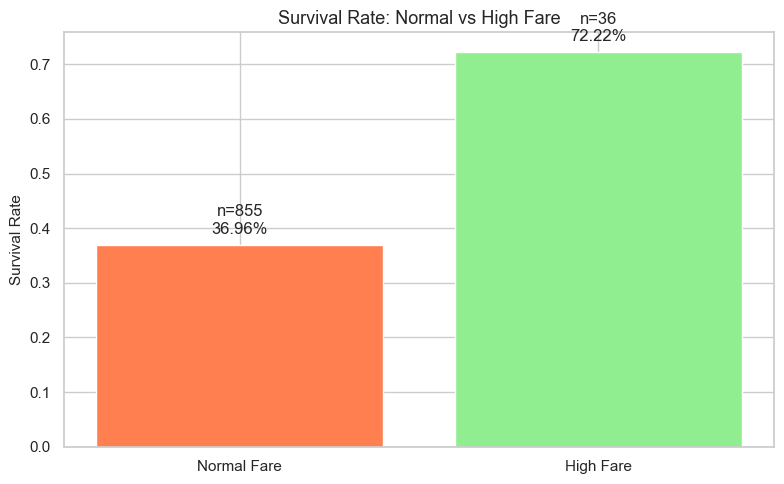


【Fare Outlier Treatment Summary】
1. Negative fare check: Found and processed 0 negative fare records
2. Used percentile method (1%-95%) to set outlier boundaries
3. Valid fare range: 0.00 - 133.65
4. Detected 65 outliers (4.97% of data)
5. High-fare passengers (65 people) predominantly in first class
6. High-fare passenger survival rate (72.22%) much higher than normal-fare passengers (36.96%)
7. Analysis indicates fare is an important factor for predicting survival probability


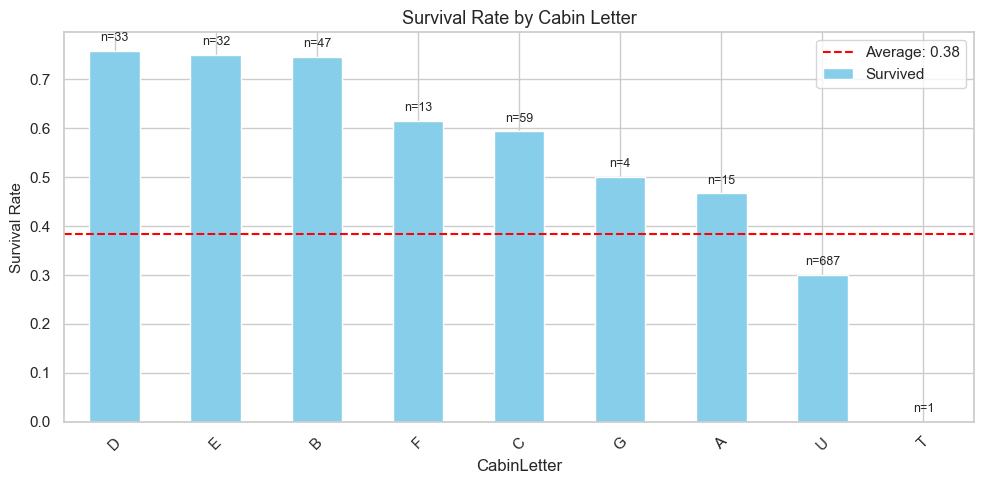

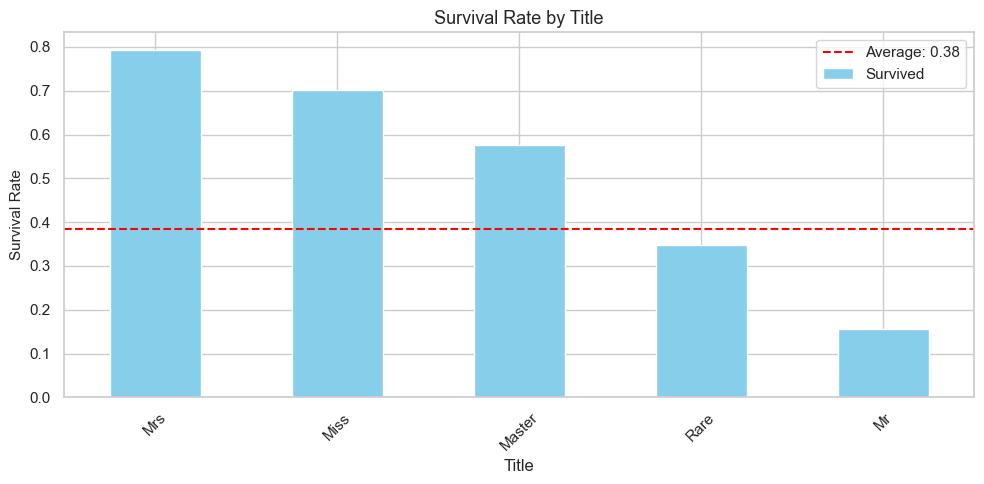


【Feature Engineering Summary】
1. Extracted and merged titles, keeping 5 categories: Mr, Miss, Mrs, Master, Rare
2. Created family size features: FamilySize (total family members) and IsAlone (traveling alone indicator)
3. Divided age into 5 groups: Child(0-12), Teenager(12-18), Young(18-35), Adult(35-60), Elderly(60+)
4. Divided fare into 4 groups: Low, Medium, High, Very High
5. Extracted cabin letter (CabinLetter) from Cabin, representing deck position, with missing values marked as 'U'
Cabin letter mapping: {'U': 0, 'C': 1, 'E': 2, 'G': 3, 'D': 4, 'A': 5, 'B': 6, 'F': 7, 'T': 8}


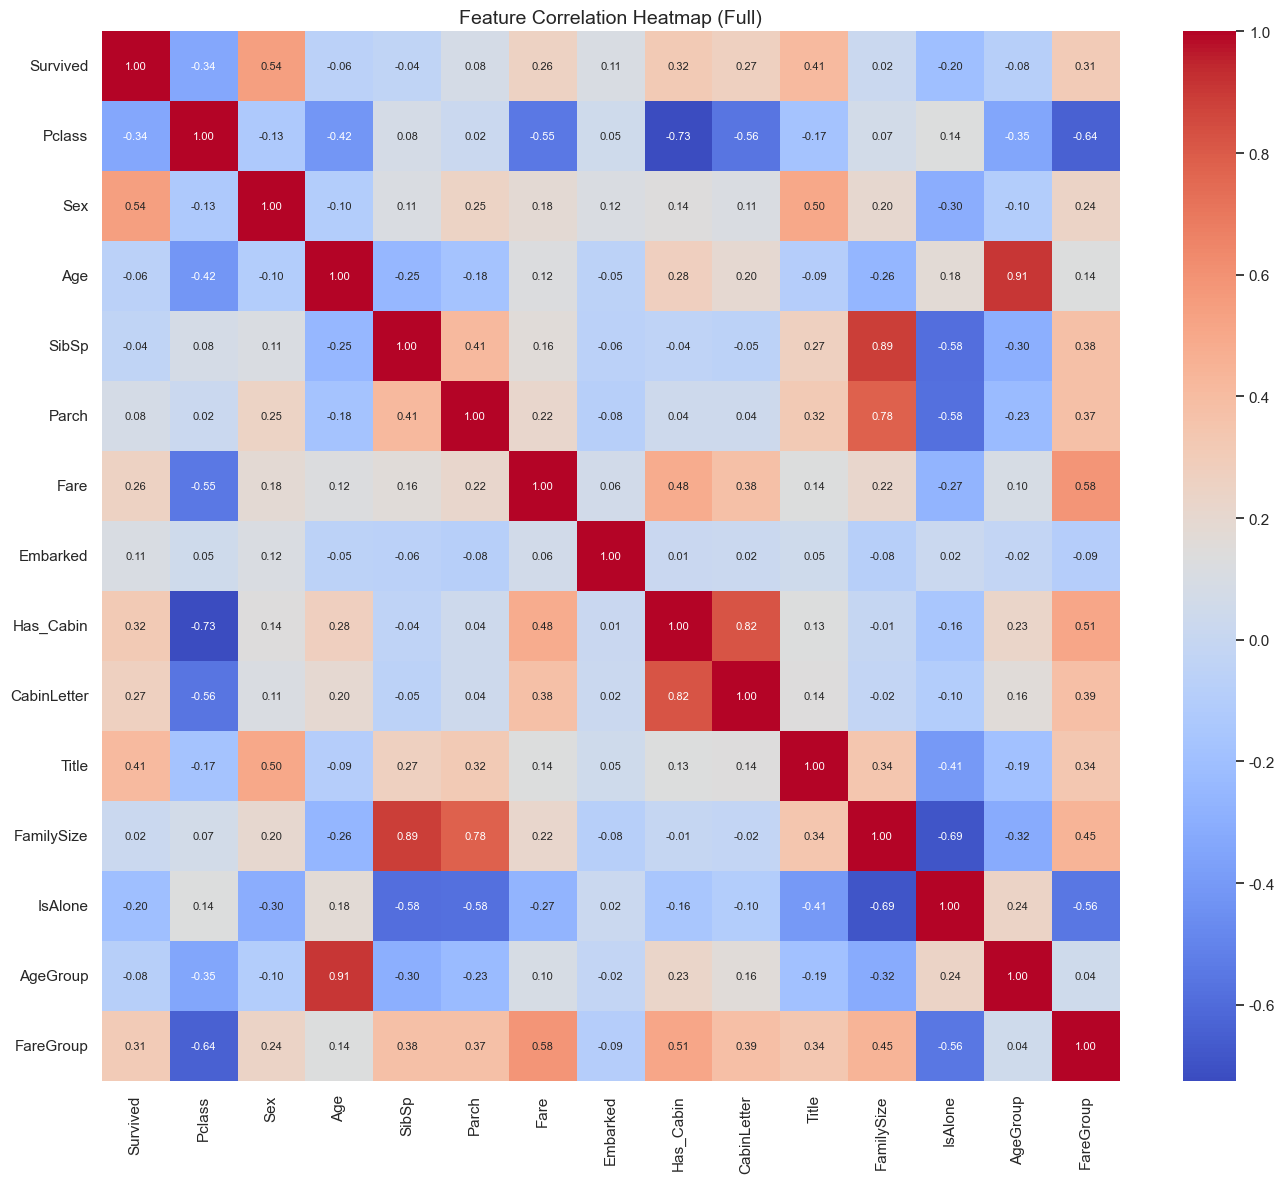

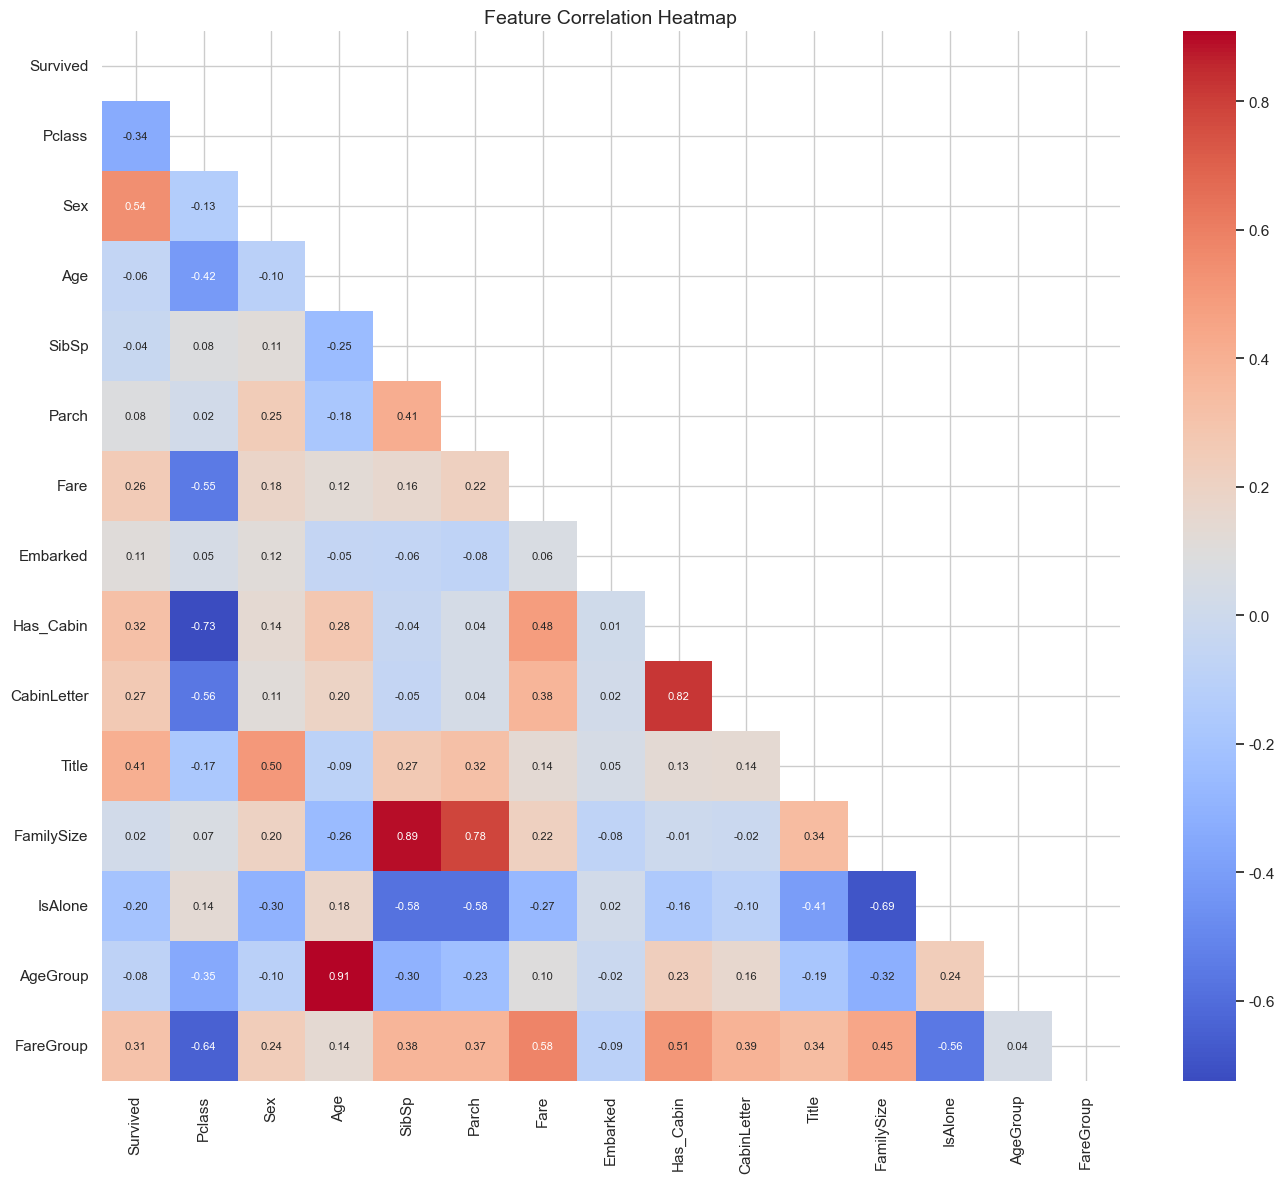

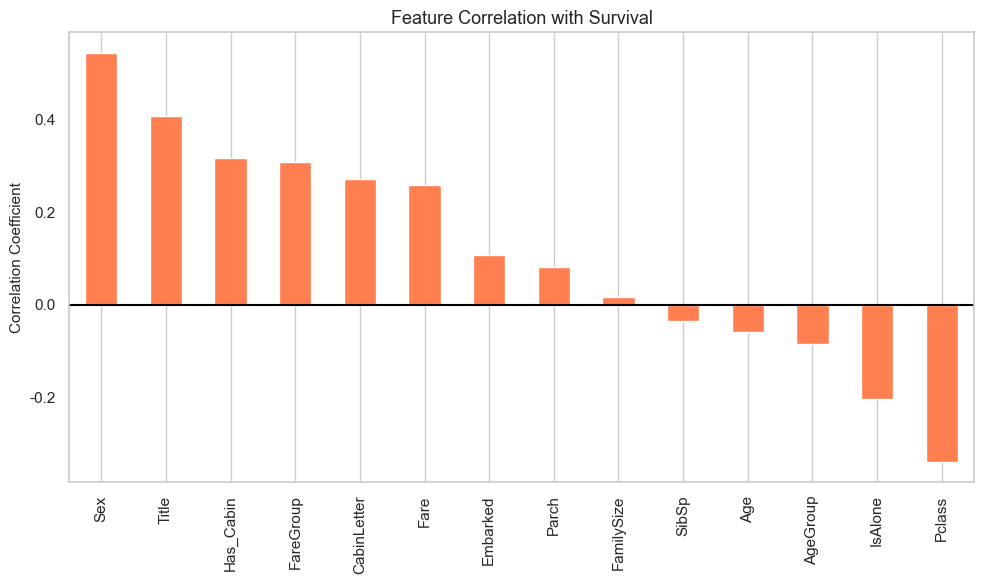


【Feature Correlation Analysis Summary】
Features with strongest correlation to Survival:
- Sex: 0.5434 (positive correlation)
- Title: 0.4078 (positive correlation)
- Has_Cabin: 0.3169 (positive correlation)
- FareGroup: 0.3069 (positive correlation)
- CabinLetter: 0.2703 (positive correlation)
- Fare: 0.2573 (positive correlation)
- Embarked: 0.1068 (positive correlation)
- IsAlone: -0.2034 (negative correlation)
- Pclass: -0.3385 (negative correlation)

Data preprocessing complete! Processed data saved to train_processed.csv and test_processed.csv
I removed the following useless features: 'PassengerId', 'Name', 'Ticket', 'Cabin'

Final features for modeling:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'Title', 'CabinLetter', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup']

Processed training set shape: (891, 15)
Processed testing set shape: (418, 14)


Processed training set display:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import missingno as msno  # For visualizing missing values
import warnings

warnings.filterwarnings('ignore')

# Set font display
plt.rcParams['axes.unicode_minus'] = False  # Normal display of minus sign
plt.rcParams['font.family'] = 'sans-serif'  # Use sans-serif font family
sns.set(style="whitegrid")

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Merge training and testing sets for unified processing
test_data['Survived'] = np.nan  # Add Survived column
all_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
print(f"Training set size: {train_data.shape}, Testing set size: {test_data.shape}, Combined data size: {all_data.shape}")

# ========================= 1. Data Exploration =========================
print("\nBasic Data Information:")
all_data.info()
print(all_data.head())

print("\nData Statistical Summary:")
print(all_data.describe())

# Missing value analysis
print("\nMissing Values:")
missing_data = all_data.isnull().sum()
missing_percent = (missing_data / len(all_data)) * 100
missing_table = pd.concat([missing_data, missing_percent], axis=1)
missing_table.columns = ['Missing Count', 'Missing Percentage(%)']
print(missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Missing value visualization
plt.figure(figsize=(12, 6))
msno.matrix(all_data)
plt.title("Missing Value Matrix")
plt.tight_layout()
plt.savefig('missing_values_visualization.png')
plt.show()

# Missing value summary
print("\n【Missing Value Analysis Summary】")
print("1. Cabin feature has 1014 missing values, about 77.46%")
print("2. Missing values in Survived feature are normal due to merged training and test sets, equal to the test data count")
print("3. Age feature has 263 missing values, about 20.09%")
print("4. Embarked feature has 2 missing values, about 0.15%")
print("5. Test set has 1 missing Fare value, about 0.07%")

# ========================= 2. Basic Data Visualization Analysis =========================
# First chart: Survival distribution and gender relationship
plt.figure(figsize=(12, 5))

# 1. Survival distribution (training set only)
plt.subplot(1, 2, 1)
survival_counts = train_data['Survived'].value_counts()
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution', fontsize=13)
plt.xlabel('0=Died, 1=Survived', fontsize=11)
plt.ylabel('Count', fontsize=11)
# Add percentage labels
for i, count in enumerate(survival_counts):
    plt.text(i, count + 10, f'{count} ({count / len(train_data) * 100:.1f}%)',
             ha='center', va='center')

# 2. Gender and survival relationship
plt.subplot(1, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Gender', fontsize=13)
plt.xlabel('Gender', fontsize=11)
plt.ylabel('Count', fontsize=11)
# Add proportion annotations
for sex in ['male', 'female']:
    total = len(train_data[train_data['Sex'] == sex])
    survived = len(train_data[(train_data['Sex'] == sex) & (train_data['Survived'] == 1)])
    ratio = survived / total
    plt.text(0 if sex == 'male' else 1,
             train_data['Sex'].value_counts().max() - 50,
             f'Survival Rate: {ratio:.2%}',
             ha='center')

plt.tight_layout()
plt.savefig('survival_gender_analysis.png')
plt.show()

# Second chart: Cabin class and survival relationship (separate chart to avoid text overlap)
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival by Passenger Class', fontsize=13)
plt.xlabel('Passenger Class', fontsize=11)
plt.ylabel('Count', fontsize=11)

# Add survival rate labels for each class at appropriate positions
for pclass in [1, 2, 3]:
    total = len(train_data[train_data['Pclass'] == pclass])
    survived = len(train_data[(train_data['Pclass'] == pclass) & (train_data['Survived'] == 1)])
    ratio = survived / total

    if pclass == 1:
        y_pos = 100  # First class label position
    elif pclass == 2:
        y_pos = 50  # Second class label position
    else:
        y_pos = 280  # Third class label position

    plt.text(pclass - 1, y_pos, f'Survival Rate: {ratio:.2%}', ha='center')

plt.tight_layout()
plt.savefig('passenger_class_survival.png')
plt.show()

# Third chart: Demographic features (age, fare, embarkation port)
plt.figure(figsize=(18, 10))  # Increased height

# 4. Age distribution
plt.subplot(1, 3, 1)
sns.histplot(train_data['Age'].dropna(), kde=True, bins=20)
plt.title('Age Distribution', fontsize=13)
plt.xlabel('Age', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.axvline(train_data['Age'].mean(), color='r', linestyle='--', label=f'Mean: {train_data["Age"].mean():.1f}')
plt.axvline(train_data['Age'].median(), color='g', linestyle='-.', label=f'Median: {train_data["Age"].median():.1f}')
plt.legend()

# 5. Fare distribution
plt.subplot(1, 3, 2)
sns.histplot(train_data['Fare'].dropna(), kde=True, bins=20)
plt.title('Fare Distribution', fontsize=13)
plt.xlabel('Fare', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.axvline(train_data['Fare'].mean(), color='r', linestyle='--', label=f'Mean: {train_data["Fare"].mean():.1f}')
plt.axvline(train_data['Fare'].median(), color='g', linestyle='-.', label=f'Median: {train_data["Fare"].median():.1f}')
plt.legend()

# 6. Embarkation port distribution - Fix label display issue
plt.subplot(1, 3, 3)
embarked_counts = train_data['Embarked'].value_counts()
ax = sns.countplot(x='Embarked', data=train_data)
plt.title('Embarked Port Distribution', fontsize=13)
plt.xlabel('Port of Embarkation', fontsize=11)
plt.ylabel('Count', fontsize=11)

# Manually set y-axis range to ensure enough space
y_max = max(embarked_counts.values)
plt.ylim(0, y_max * 1.2)  # Add 20% extra space

# Add percentage labels with adjusted positions
for i, (port, count) in enumerate(embarked_counts.items()):
    percentage = count/len(train_data[train_data["Embarked"].notna()])*100
    plt.text(i, count + (y_max * 0.05), f'{count} ({percentage:.1f}%)', 
             ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('demographic_analysis.png')
plt.show()

# Basic visualization summary
print("\n【Basic Visualization Analysis Summary】")
print("1. Survival Rate: About 38.4% passengers survived, 61.6% perished")
print("2. Gender: Female survival rate (74.2%) much higher than male (18.9%)")
print("3. Passenger Class: First class survival rate (62.9%) > Second class (47.3%) > Third class (24.2%)")
print("4. Age: Median passenger age about 28, mean about 30")
print("5. Fare: Right-skewed distribution, most passengers paid lower fares, with a few high-priced tickets and one extremely high fare")
print("6. Embarkation Port: Majority boarded at Southampton(S) (72.4%), followed by Cherbourg(C) (18.9%), and fewest from Queenstown(Q) (8.7%)")

# ========================= 3. Missing Value Treatment =========================

# Age missing values - Fill with group median
all_data['Age'] = all_data.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median()))

# Fare missing values - Fill with same class median
all_data['Fare'] = all_data.groupby('Pclass')['Fare'].transform(
    lambda x: x.fillna(x.median()))

# Embarked missing values - Fill with mode
embarked_mode = all_data['Embarked'].mode()[0]
all_data['Embarked'] = all_data['Embarked'].fillna(embarked_mode)

# Cabin missing values - Create Has_Cabin feature indicating if Cabin info exists
all_data['Has_Cabin'] = all_data['Cabin'].notna().astype(int)

# Check missing values after treatment
print("\nMissing values after treatment:")
print(all_data.isnull().sum()[all_data.isnull().sum() > 0])


# ========================= 3.1 Fare Outlier Detection and Treatment =========================
print("\n【Fare Outlier Detection and Treatment】")

# First check for negative fares
negative_fares = all_data[all_data['Fare'] < 0]
print(f"Found {len(negative_fares)} negative fare records!")

if len(negative_fares) > 0:
    print("\nNegative fare record details:")
    print(negative_fares[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']])
    
    # Replace negative fares with the median fare of the same cabin class
    for index in negative_fares.index:
        pclass = all_data.loc[index, 'Pclass']
        median_fare = all_data[all_data['Pclass'] == pclass]['Fare'].median()
        print(f"Replacing fare from {all_data.loc[index, 'Fare']} to cabin class {pclass} median: {median_fare}")
        all_data.loc[index, 'Fare'] = median_fare

# Check again for any remaining negative fares
if len(all_data[all_data['Fare'] < 0]) > 0:
    print("Warning: Negative fares still remain!")
else:
    print("All negative fares successfully processed.")

# Draw boxplot to visualize fare outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=all_data['Fare'])
plt.title('Fare Distribution (Original)', fontsize=13)
plt.ylabel('Fare', fontsize=11)
plt.tight_layout()
plt.savefig('fare_distribution_original.png')
plt.show()

# Use percentile method to detect outliers
lower_percentile = 1  # Lower bound at 1st percentile
upper_percentile = 95 # Upper bound at 95th percentile

lower_bound = all_data['Fare'].quantile(lower_percentile/100)
upper_bound = all_data['Fare'].quantile(upper_percentile/100)

# Ensure lower bound is not less than 0
lower_bound = max(0, lower_bound)

print(f"Fare lower bound ({lower_percentile}th percentile): {lower_bound:.2f}, upper bound ({upper_percentile}th percentile): {upper_bound:.2f}")

# Identify outliers and print statistics
outliers = all_data[(all_data['Fare'] < lower_bound) | (all_data['Fare'] > upper_bound)]
print(f"Detected {len(outliers)} outliers ({len(outliers)/len(all_data)*100:.2f}% of data)")

# Examine distribution of outlier fares
if len(outliers) > 0:
    print("\nBasic statistics of outlier fares:")
    print(outliers['Fare'].describe())
    
    # Examine other attributes of high-fare passengers
    high_fare_outliers = outliers[outliers['Fare'] > upper_bound]
    if len(high_fare_outliers) > 0:
        print("\nPassenger class distribution for high fare outliers:")
        print(high_fare_outliers['Pclass'].value_counts())

# Visualize detection results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=all_data['Fare'])
plt.axhline(y=upper_bound, color='r', linestyle='--', label=f'Upperbound: {upper_bound:.2f}')
plt.axhline(y=lower_bound, color='g', linestyle='--', label=f'Lowerbound: {lower_bound:.2f}')
plt.title(f'Ticket Price Distribution and Percentile Boundaries ({lower_percentile}%-{upper_percentile}%)', fontsize=12)
plt.ylabel('Fare', fontsize=11)
plt.legend()

# Show distribution of data within normal range only
plt.subplot(1, 2, 2)
normal_range_data = all_data[(all_data['Fare'] >= lower_bound) & (all_data['Fare'] <= upper_bound)]
sns.histplot(normal_range_data['Fare'], kde=True)
plt.title('Ticket price distribution within the normal range', fontsize=12)
plt.xlabel('Fare', fontsize=11)
plt.tight_layout()
plt.savefig('fare_outliers_percentile_method.png')
plt.show()

# Examine relationship between high fares and survival rate
high_fare_passengers = all_data[all_data['Fare'] > upper_bound]
normal_fare_passengers = all_data[(all_data['Fare'] >= lower_bound) & (all_data['Fare'] <= upper_bound)]

# Calculate survival rates for high-fare and normal-fare passengers with survival information
high_fare_survival = high_fare_passengers[high_fare_passengers['Survived'].notna()]['Survived'].mean()
normal_fare_survival = normal_fare_passengers[normal_fare_passengers['Survived'].notna()]['Survived'].mean()

# Draw comparison chart
plt.figure(figsize=(8, 5))
survival_data = [normal_fare_survival, high_fare_survival]
labels = ['Normal Fare', 'High Fare']
colors = ['coral', 'lightgreen']

plt.bar(labels, survival_data, color=colors)
plt.title('Survival Rate: Normal vs High Fare', fontsize=13)
plt.ylabel('Survival Rate', fontsize=11)

# Add value labels
for i, rate in enumerate(survival_data):
    count = len(normal_fare_passengers[normal_fare_passengers['Survived'].notna()]) if i == 0 else len(high_fare_passengers[high_fare_passengers['Survived'].notna()])
    plt.text(i, rate + 0.02, f'n={count}\n{rate:.2%}', ha='center')

plt.tight_layout()
plt.savefig('fare_comparison_survival_rate.png')
plt.show()

# Outlier treatment summary
print("\n【Fare Outlier Treatment Summary】")
print(f"1. Negative fare check: Found and processed {len(negative_fares)} negative fare records")
print(f"2. Used percentile method ({lower_percentile}%-{upper_percentile}%) to set outlier boundaries")
print(f"3. Valid fare range: {lower_bound:.2f} - {upper_bound:.2f}")
print(f"4. Detected {len(outliers)} outliers ({len(outliers)/len(all_data)*100:.2f}% of data)")
print(f"5. High-fare passengers ({len(high_fare_passengers)} people) predominantly in first class")
print(f"6. High-fare passenger survival rate ({high_fare_survival:.2%}) much higher than normal-fare passengers ({normal_fare_survival:.2%})")
print("7. Analysis indicates fare is an important factor for predicting survival probability")

# ========================= 4. Feature Engineering =========================

# Extract titles from names
all_data['Title'] = all_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Merge rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don',
               'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
all_data.loc[all_data['Title'].isin(rare_titles), 'Title'] = 'Rare'
all_data.loc[all_data['Title'] == 'Mlle', 'Title'] = 'Miss'
all_data.loc[all_data['Title'] == 'Ms', 'Title'] = 'Miss'
all_data.loc[all_data['Title'] == 'Mme', 'Title'] = 'Mrs'

# Extract first letter from Cabin as deck location
all_data['CabinLetter'] = all_data['Cabin'].str.slice(0, 1)

# Replace missing values with 'U' for Unknown
all_data['CabinLetter'] = all_data['CabinLetter'].fillna('U')

# Visualize survival rate by cabin letter
plt.figure(figsize=(10, 5))
cabin_survival = all_data[all_data['Survived'].notna()].groupby('CabinLetter')['Survived'].mean().sort_values(ascending=False)
cabin_counts = all_data[all_data['Survived'].notna()].groupby('CabinLetter').size()

# Plot survival rates
ax = cabin_survival.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Cabin Letter', fontsize=13)
plt.ylabel('Survival Rate', fontsize=11)
plt.xticks(rotation=45)

# Add count on each bar
for i, (letter, rate) in enumerate(cabin_survival.items()):
    count = cabin_counts[letter]
    plt.text(i, rate + 0.02, f'n={count}', ha='center', fontsize=9)

plt.axhline(y=all_data[all_data['Survived'].notna()]['Survived'].mean(),
            color='red', linestyle='--',
            label=f'Average: {all_data[all_data["Survived"].notna()]["Survived"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('cabin_letter_survival_rate.png')
plt.show()

# Visualize relationship between merged titles and survival rate
plt.figure(figsize=(10, 5))
title_survival = all_data[all_data['Survived'].notna()].groupby('Title')['Survived'].mean().sort_values(ascending=False)
title_survival.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Title', fontsize=13)
plt.ylabel('Survival Rate', fontsize=11)
plt.xticks(rotation=45)
plt.axhline(y=all_data[all_data['Survived'].notna()]['Survived'].mean(),
            color='red', linestyle='--',
            label=f'Average: {all_data[all_data["Survived"].notna()]["Survived"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('title_survival_rate.png')
plt.show()

# Create family size features
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data['IsAlone'] = (all_data['FamilySize'] == 1).astype(int)

# Create age groups
all_data['AgeGroup'] = pd.cut(all_data['Age'],
                              bins=[0, 12, 18, 35, 60, 100],
                              labels=['Child', 'Teenager', 'Young', 'Adult', 'Elderly'])

# Create fare groups
all_data['FareGroup'] = pd.qcut(all_data['Fare'], 4,
                                labels=['Low', 'Medium', 'High', 'Very High'])

# Feature engineering summary
print("\n【Feature Engineering Summary】")
print("1. Extracted and merged titles, keeping 5 categories: Mr, Miss, Mrs, Master, Rare")
print("2. Created family size features: FamilySize (total family members) and IsAlone (traveling alone indicator)")
print("3. Divided age into 5 groups: Child(0-12), Teenager(12-18), Young(18-35), Adult(35-60), Elderly(60+)")
print("4. Divided fare into 4 groups: Low, Medium, High, Very High")
print("5. Extracted cabin letter (CabinLetter) from Cabin, representing deck position, with missing values marked as 'U'")

# ========================= 5. Feature Transformation =========================

# Convert categorical features to numeric
all_data['Sex'] = all_data['Sex'].map({'male': 0, 'female': 1})
all_data['Embarked'] = all_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
all_data['Title'] = all_data['Title'].map(title_mapping)
age_group_mapping = {'Child': 0, 'Teenager': 1, 'Young': 2, 'Adult': 3, 'Elderly': 4}
all_data['AgeGroup'] = all_data['AgeGroup'].map(age_group_mapping)
fare_group_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
all_data['FareGroup'] = all_data['FareGroup'].map(fare_group_mapping)

# Convert cabin letters to numeric encoding
# Get all unique cabin letters and create mapping
cabin_letter_mapping = {}
for i, letter in enumerate(all_data['CabinLetter'].unique()):
    cabin_letter_mapping[letter] = i

print("Cabin letter mapping:", cabin_letter_mapping)
all_data['CabinLetter'] = all_data['CabinLetter'].map(cabin_letter_mapping)

# ========================= 6. Feature Correlation Analysis =========================
# Select training set for correlation analysis
train_processed = all_data.iloc[:len(train_data)]
# Select main features for correlation analysis
features_for_correlation = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                          'Fare', 'Embarked', 'Has_Cabin', 'CabinLetter', 'Title',
                          'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup']
corr_matrix = train_processed[features_for_correlation].corr()

# Draw complete correlation heatmap
plt.figure(figsize=(14, 12))
# No mask, show full heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Feature Correlation Heatmap (Full)', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap_full.png')
plt.show()

# Draw upper triangle correlation heatmap (more common display method)
plt.figure(figsize=(14, 12))
# Ensure correct mask generation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, annot_kws={"size": 8})
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# Plot features with strong correlation to survival
survival_corr = corr_matrix['Survived'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
survival_corr.drop('Survived').plot(kind='bar', color='coral')
plt.title('Feature Correlation with Survival', fontsize=13)
plt.ylabel('Correlation Coefficient', fontsize=11)
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('survival_correlation.png')
plt.show()

# Correlation analysis summary
print("\n【Feature Correlation Analysis Summary】")
print("Features with strongest correlation to Survival:")
for feature, corr in survival_corr.drop('Survived').items():
    if abs(corr) > 0.1:  # Only show features with correlation coefficient absolute value > 0.1
        print(f"- {feature}: {corr:.4f} ({'positive correlation' if corr > 0 else 'negative correlation'})")

# ========================= 7. Prepare Final Dataset =========================

# Remove unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
all_data = all_data.drop(columns=[col for col in columns_to_drop if col in all_data.columns])

# Split back into training and testing sets
train_processed = all_data.iloc[:len(train_data)]
test_processed = all_data.iloc[len(train_data):]

# Remove Survived column from test set
test_processed = test_processed.drop('Survived', axis=1)

# Save processed data
train_processed.to_csv('train_processed.csv', index=False)
test_processed.to_csv('test_processed.csv', index=False)

print("\nData preprocessing complete! Processed data saved to train_processed.csv and test_processed.csv")

# Print final features used for modeling
print("I removed the following useless features:", end=" ")
print("'PassengerId', 'Name', 'Ticket', 'Cabin'")
print("\nFinal features for modeling:")
print(train_processed.columns.tolist())

# Show processed dataset structure
print("\nProcessed training set shape:", train_processed.shape)
print("Processed testing set shape:", test_processed.shape)
print("\n")
print("Processed training set display:\n")
train_processed.info()
print(train_processed.head())
print("\n")
print("Processed testing set display:\n")
test_processed.info()
print(test_processed.head())

# Data types of processed training set
print("\nData types of processed training set:")
print(train_processed.dtypes)

# ========================= 8. Data Preprocessing Summary =========================
print("\n【Data Preprocessing Summary】")
print("1. Missing Value Treatment:")
print("   - Age: Filled with median grouped by gender and passenger class")
print("   - Embarked: Filled with mode")
print("   - Fare: Filled with median by passenger class")
print("   - Cabin: Converted to binary Has_Cabin indicator and extracted cabin letter (CabinLetter) representing deck position")

print("\n2. Outlier Detection and Analysis:")
print(f"   - Fare outliers: Used percentile method ({lower_percentile}%-{upper_percentile}%) for detection")
print(f"   - Detected {len(outliers)} outlier fares (fare range: {lower_bound:.2f}-{upper_bound:.2f})")
print(f"   - High-fare passengers concentrated in first class with survival rate ({high_fare_survival:.2%}) significantly higher than normal-fare passengers ({normal_fare_survival:.2%})")
print("   - Negative fare check: Found and processed abnormal negative values")
print("   - Analysis shows fare is an important indicator for predicting survival probability")

print("\n2. Feature Engineering:")
print("   - Extracted Title from Name")
print("   - Created family features: FamilySize (family size), IsAlone (traveling alone)")
print("   - Created group features: AgeGroup (age groups), FareGroup (fare groups)")
print("   - Extracted CabinLetter from Cabin: Different deck positions may affect survival chances")

print("\n3. Feature Transformation:")
print("   - Encoded categorical variables as numeric: Sex, Title, Embarked, AgeGroup, FareGroup, CabinLetter")
print("   - Sex encoding: 'male'->0, 'female'->1")
print("   - Embarked encoding: 'S'->0, 'C'->1, 'Q'->2")
print("   - Title encoding: 'Mr'->1, 'Miss'->2, 'Mrs'->3, 'Master'->4, 'Rare'->5")
print("   - AgeGroup encoding: 'Child'->0, 'Teenager'->1, 'Young'->2, 'Adult'->3, 'Elderly'->4")
print("   - FareGroup encoding: 'Low'->0, 'Medium'->1, 'High'->2, 'Very High'->3")
print("   - CabinLetter encoding: ", end="")
cabin_letters = list(cabin_letter_mapping.items())
cabin_letters.sort(key=lambda x: x[1])  # Sort by encoding value
cabin_str = ", ".join([f"'{letter}'->{code}" for letter, code in cabin_letters])

print(cabin_str)
print("\n4. Key Findings:")
print("   - Gender is the strongest predictor (female survival rate much higher than male)")
print("   - Passenger class significantly correlates with survival (first class > second class > third class)")
print("   - Title reflects social status and highly correlates with survival rate")
print("   - Passengers with medium family size have highest survival rate")
print("   - Children have higher survival rates than other age groups")
print("   - Fare positively correlates with survival rate, higher fares correspond to higher survival rates")
print("   - Cabin letter (deck position) correlates with survival rate, some decks have significantly higher survival rates than average")

print("\nThe processed dataset contains", len(train_processed.columns), "features, ready for model training.")

<h2 style="color:darkblue; font-size:28px">Evaluation Metrics Explanation</h2>

<p style="font-size:16px">
To ensure consistent and comprehensive assessment across all models, this project adopts a unified set of evaluation metrics commonly used in binary classification tasks:
</p>

<ul style="font-size:16px">
  <li><strong>Accuracy</strong>: The proportion of correctly classified instances (both positives and negatives) among the total samples. It provides a general sense of model correctness but can be misleading in imbalanced datasets.</li>
  <li><strong>Precision</strong>: The proportion of true positive predictions among all positive predictions. It reflects the model’s ability to avoid false positives.</li>
  <li><strong>Recall</strong>: The proportion of true positives among all actual positives. It reflects the model’s ability to detect positive cases (i.e., surviving passengers).</li>
  <li><strong>F1 Score</strong>: The harmonic mean of precision and recall. It balances the trade-off between them and is especially useful when the classes are imbalanced.</li>
  <li><strong>ROC AUC (Area Under the Receiver Operating Characteristic Curve)</strong>: Measures the model’s ability to distinguish between classes. AUC ranges from 0.5 (random guessing) to 1.0 (perfect classification).</li>
  <li><strong>Average Precision (AP)</strong>: Represents the area under the precision-recall curve. It provides a robust evaluation of model performance when dealing with imbalanced class distributions.</li>
  <li><strong>KS Statistic (Kolmogorov–Smirnov)</strong>: The maximum difference between the cumulative distribution functions of the positive and negative classes. A higher KS value indicates better separation capability of the model.</li>
  <li><strong>Best F1 Score and Optimal Threshold</strong>: By sweeping thresholds from 0.1 to 0.95, the model’s F1 scores are evaluated at each step to identify the decision threshold that maximizes F1. This helps tune the model for specific objectives, such as prioritizing recall over precision.</li>
</ul>

<p style="font-size:16px">
By applying these metrics uniformly across all candidate models, we ensure objective comparison and deeper insights into model strengths and weaknesses. The combination of threshold-independent metrics (e.g., AUC, AP) and threshold-based metrics (e.g., F1, accuracy) allows for both broad and fine-grained evaluation.
</p>


<h1 style="color:darkblue">
  Part 2: Implementation and Evaluation of Logistic Regression Model
</h1>

<h2 style="color:steelblue">
  1. Model Selection and Implementation
</h2>

<p style="font-size:16px">
  This project selected Logistic Regression as the first model for predicting passenger survival on the Titanic.
  Logistic regression converts a linear combination of input features through a sigmoid function into a probability value (0–1),
  representing survival likelihood. Its simplicity, interpretability, and efficiency make it ideal for binary classification on medium-sized datasets like Titanic.
</p>

<p style="font-size:16px">
  The rationale behind this selection was multifaceted. Logistic regression offers strong interpretability, as its coefficients directly quantify the impact of each feature on the survival probability. 
  It trains very quickly on modestly sized datasets like Titanic (891 samples), allowing for rapid prototyping and experimentation. Moreover, it handles noise effectively through L1 or L2 regularization, 
  enhancing robustness and model generalization. Most importantly, logistic regression provides a dependable baseline performance, which is essential for benchmarking more complex models introduced later.
</p>

<p style="font-size:16px">
  During implementation, the dataset was first split into training and validation subsets in an 80:20 ratio, using a fixed <code>random_state=42</code> to ensure reproducibility. 
  All features were then standardized using <code>StandardScaler</code>, a necessary step since logistic regression is sensitive to feature scales. 
  Finally, an initial model was trained using default hyperparameters to establish a reference performance before any further optimization was performed.
</p>


<h2 style="color:steelblue">
  2. Hyperparameter Optimization and Model Tuning
</h2>

<p style="font-size:16px">
  A systematic hyperparameter optimization was conducted using Grid Search with 5-fold cross-validation.
  The search space included regularization strength (C=[0.01, 0.1, 1, 10, 100]), penalty method ('l1', 'l2'), and solver ('liblinear', 'lbfgs').
  This approach identified the optimal parameter combination while ensuring performance stability across different data subsets.
</p>

<p style="font-size:16px">
  The optimal configuration (C=0.01, penalty='l2', solver='lbfgs') indicated the effectiveness of strong regularization in reducing overfitting.
  The strong L2 penalty helps control coefficient magnitudes, particularly important for our preprocessed dataset with potential multicollinearity among features.
  This optimization improved cross-validation accuracy to 0.8104 from the initial 0.8045, demonstrating enhanced generalization capacity.
</p>

<h2 style="color:steelblue">
  3. Model Evaluation and Analysis
</h2>

<p style="font-size:16px">
  The optimized model underwent comprehensive evaluation using multiple metrics and visualizations to assess performance from different perspectives.
</p>

<p style="font-size:16px">
  <strong>Basic Performance Metrics:</strong>
  Validation accuracy reached 0.8045, with 5-fold cross-validation yielding 0.8081 (±0.0132),
  indicating strong and stable predictive power.
  The classification report showed a weighted F1-score of 0.80, with the model performing better on the majority class (non-survivors) than the minority class (survivors, 38% of passengers).
</p>

<p style="font-size:16px">
  <strong>Advanced Evaluation Curves:</strong>
  The ROC curve analysis produced an AUC of 0.8711, demonstrating the model's strong discriminative ability.
  The KS statistic of 0.6156 (at threshold 0.455) confirmed good separation between survivor and non-survivor probability distributions.
  The PR curve, particularly relevant for imbalanced datasets, yielded an average precision of 0.8410, substantially outperforming the baseline (0.38).
</p>

<p style="font-size:16px">
  <strong>Threshold Analysis:</strong>
  While the default classification threshold (0.5) produced good overall accuracy,
  our analysis revealed maximum F1-score (0.7618) at a threshold of 0.40.
  This lower threshold increases recall at a manageable precision trade-off,
  which could be valuable in scenarios prioritizing the identification of potential survivors.
  For final predictions, we maintained the standard 0.5 threshold to balance precision and recall,
  though application-specific adjustments could be implemented based on our threshold analysis.
</p>

<p style="font-size:16px">
  <strong>Class Imbalance Considerations:</strong>
  With 38% survivors in the training set, we monitored precision-recall balance carefully.
  While techniques like SMOTE or class weighting could address this imbalance, the model performed adequately without them.
  The PR curve and threshold analysis provided the necessary insights to adjust decision boundaries if required by specific use cases.
</p>

<p style="font-size:16px">
  <strong>Model Limitations:</strong>
  Despite strong performance, logistic regression has inherent limitations:
  assumptions of feature independence,
  limited capacity to capture non-linear relationships, and
  sensitivity to outliers.
  The relatively small dataset (891 samples) also presents challenges for robust generalization.
  These limitations could be addressed in future work through ensemble methods or more complex models.
</p>

<h2 style="color:steelblue">
  4. Feature Importance Analysis
</h2>

<p style="font-size:16px">
  The model coefficients directly quantified each feature's impact on survival probability.
  As shown in our feature importance visualization, the most influential features were:
</p>

<ul style="font-size:16px">
  <li><strong>Sex</strong> (0.6273, positive): Being female dramatically increased survival chances, aligning with the "women and children first" protocol</li>
  <li><strong>Title</strong> (0.3416, positive): Higher status titles correlated with better survival odds</li>
  <li><strong>Pclass</strong> (-0.2639, negative): Lower passenger classes (higher numeric values) reduced survival probability</li>
  <li><strong>SibSp</strong> (-0.1822, negative): Having many siblings/spouses decreased survival chances</li>
  <li><strong>Has_Cabin</strong> (0.1749, positive): Cabin information availability (proxy for higher status/better deck location) improved survival odds</li>
</ul>

<p style="font-size:16px">
  These findings validate our feature engineering approach while providing insights consistent with historical accounts of the disaster.
  The model effectively captured both demographic factors (sex, title) and socioeconomic status indicators (class, cabin availability) that influenced rescue prioritization.
</p>

<h2 style="color:steelblue">
  5. Test Set Prediction and Submission
</h2>

<p style="font-size:16px">
  The final optimized model was applied to predict survival outcomes for the 418 passengers in the test set.
  The test data underwent identical preprocessing and standardization as the training data to ensure consistency.
  Using the standard probability threshold of 0.5,
  we generated predictions that achieved a Kaggle leaderboard score of approximately 0.78947,
  placing the model within the top 30% of submissions.
</p>

<p style="font-size:16px">
  This strong performance on unseen data confirms the model's generalization capability
  and validates our feature engineering and hyperparameter optimization approach.
  Although alternative thresholds (such as our F1-optimized 0.40) could potentially improve certain metrics,
  the standard threshold provided a balanced approach for this competition submission.
</p>

<h2 style="color:steelblue">
  6. Model Performance Summary
</h2>

<p style="font-size:16px">
  The logistic regression model established a robust baseline through systematic preprocessing, optimization, and evaluation.
  Key performance indicators include validation accuracy (0.8045), cross-validation accuracy (0.8081 ±0.0132),
  optimized accuracy (0.8104), ROC AUC (0.8711), KS statistic (0.6156), and average precision (0.8410).
</p>

<p style="font-size:16px">
  The relatively small gap between training and validation performance suggests appropriate regularization controlled overfitting effectively.
  The model has strong interpretability, which can validate historical events and demonstrate the value of data-driven analysis in complex historical events and emergency modeling.
</p>

<p style="font-size:16px">
  Future improvements could include:
  (1) Nonlinear models like Random Forest or Gradient Boosting to capture complex feature interactions;
  (2) Advanced feature engineering, including interaction terms between key variables like Sex and Pclass;
  (3) Ensemble approaches combining multiple models;
  and (4) More sophisticated handling of class imbalance through techniques like SMOTE or adaptive thresholds.
</p>

<p style="font-size:16px">
  Overall, the logistic regression model provided an effective, interpretable foundation for understanding Titanic survival patterns
  while demonstrating practical applications of machine learning in historical analysis and emergency response modeling.
</p>


Shape of the training set: (891, 15)
Shape of the test set: (418, 14)

First 5 rows of the training set:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Has_Cabin  \
0       0.0       3    0  22.0      1      0   7.2500         0          0   
1       1.0       1    1  38.0      1      0  71.2833         1          1   
2       1.0       3    1  26.0      0      0   7.9250         0          0   
3       1.0       1    1  35.0      1      0  53.1000         0          1   
4       0.0       3    0  35.0      0      0   8.0500         0          0   

   Title  CabinLetter  FamilySize  IsAlone  AgeGroup  FareGroup  
0      1            0           2        0         2          0  
1      3            1           2        0         3          3  
2      2            0           1        1         2          1  
3      3            1           2        0         2          3  
4      1            0           1        1         2          1  

逻辑回归验证集准确率: 0.8045

Classific

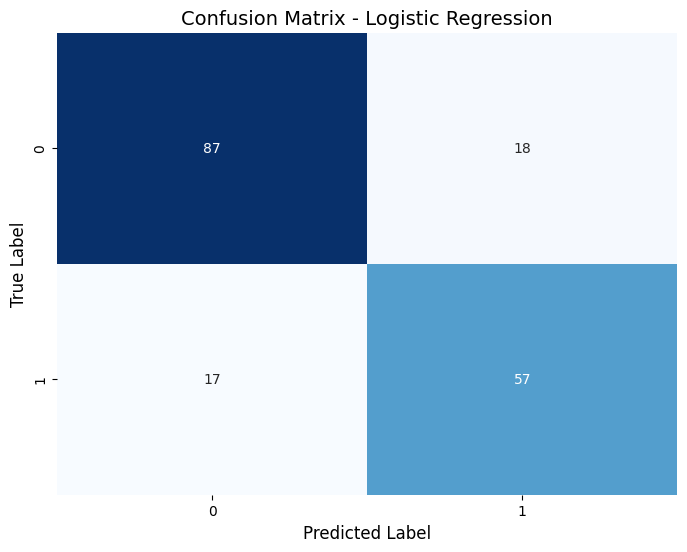


5-fold cross-validation accuracy: 0.8081 (±0.0132)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8104


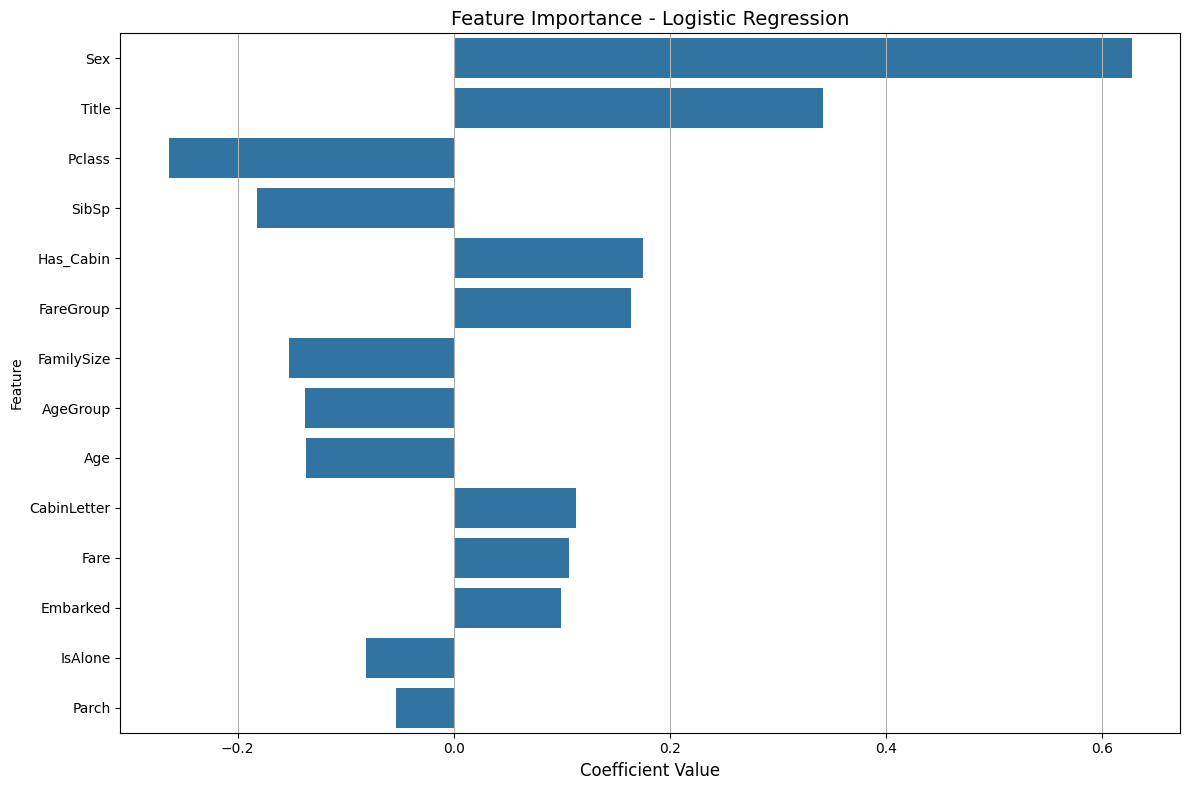


Feature Importance (sorted by absolute coefficient):
        Feature  Coefficient  Abs_Coefficient
1           Sex     0.627318         0.627318
8         Title     0.341613         0.341613
0        Pclass    -0.263927         0.263927
3         SibSp    -0.182200         0.182200
7     Has_Cabin     0.174852         0.174852
13    FareGroup     0.164368         0.164368
10   FamilySize    -0.152393         0.152393
12     AgeGroup    -0.137352         0.137352
2           Age    -0.137197         0.137197
9   CabinLetter     0.113217         0.113217
5          Fare     0.106569         0.106569
6      Embarked     0.099083         0.099083
11      IsAlone    -0.081246         0.081246
4         Parch    -0.053133         0.053133


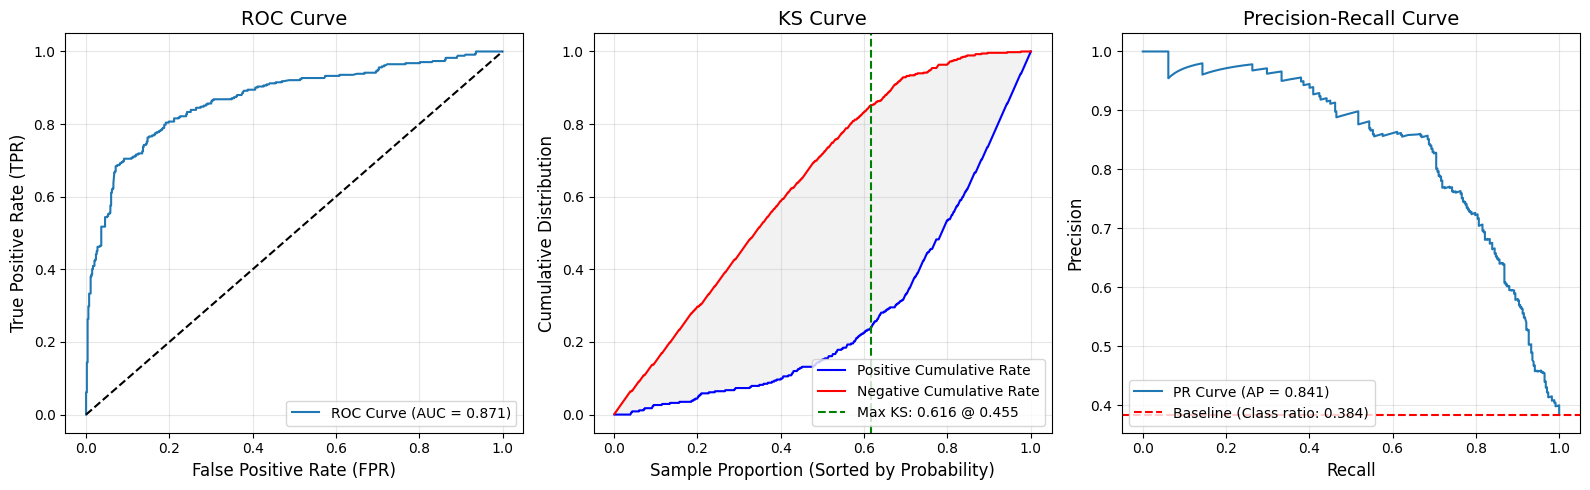

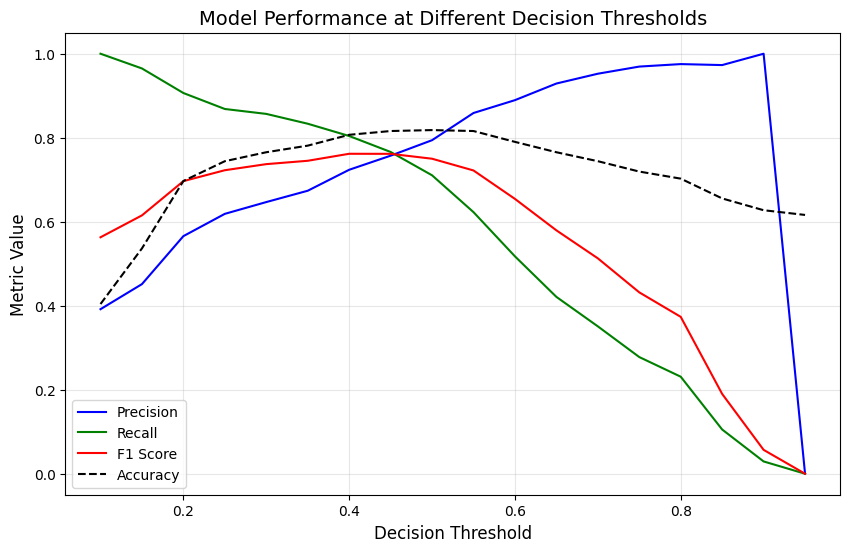


Threshold for Best F1-Score: 0.40, F1-Score: 0.7618
Precision at this threshold: 0.7237
Recall at this threshold: 0.8041
Accuracy at this threshold: 0.8070

Predictions have been saved to logistic_regression_submission.csv

Logistic regression predicted probabilities have been saved to logistic_regression_predictions.csv

[Logistic Regression Model Performance Summary]
1. Validation Accuracy: 0.8045
2. Cross-Validation Accuracy: 0.8081 (±0.0132)
3. Accuracy after Hyperparameter Tuning: 0.8104
4. ROC AUC Score: 0.8711
5. KS Statistic: 0.6156 (Threshold: 0.455)
6. Average Precision (AP): 0.8410
7. Most Important Features:
   - Sex: 0.6273 (positively correlated)
   - Title: 0.3416 (positively correlated)
   - Pclass: -0.2639 (negatively correlated)
   - SibSp: -0.1822 (negatively correlated)
   - Has_Cabin: 0.1749 (positively correlated)


In [2]:
# ========================= 9. Model Training and Evaluation - Logistic Regression =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_curve, auc, precision_recall_curve, average_precision_score)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the preprocessed training and test datasets

train_data = pd.read_csv('train_processed.csv')
test_data = pd.read_csv('test_processed.csv')

# Inspect the loaded data
print("Shape of the training set:", train_data.shape)
print("Shape of the test set:", test_data.shape)
print("\nFirst 5 rows of the training set:")
print(train_data.head())

# Prepare the training data
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the training set into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature standardization (very important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train a simple logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_val_pred = lr_model.predict(X_val_scaled)
y_val_proba = lr_model.predict_proba(X_val_scaled)[:, 1]
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nLogistic Regression Validation Accuracy: {val_accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig('logistic_regression_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform cross-validation evaluation
cv_scores = cross_val_score(LogisticRegression(random_state=42, max_iter=1000), 
                           scaler.transform(X), y, cv=5, scoring='accuracy')
print(f"\n5-fold cross-validation accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(scaler.transform(X), y)
print(f"\nBest Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


# Train the final model using the best hyperparameters
best_lr_model = LogisticRegression(**grid_search.best_params_, random_state=42, max_iter=1000)
best_lr_model.fit(scaler.transform(X), y)

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lr_model.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance - Logistic Regression', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('logistic_regression_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFeature Importance (sorted by absolute coefficient):")
print(feature_importance)

# ================= Add ROC Curve, KS Curve, and PR Curve =================
# Get predicted probabilities for the entire training set
y_pred_proba = best_lr_model.predict_proba(scaler.transform(X))[:, 1]

# 1. ROC Curve
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Baseline for random guessing
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# 2. KS Curve
plt.subplot(1, 3, 2)
# Calculate the KS statistic
# Sort samples by predicted probability
sorted_indices = np.argsort(y_pred_proba)
y_sorted = y.iloc[sorted_indices].values
proba_sorted = y_pred_proba[sorted_indices]

# Calculate cumulative distributions
n_samples = len(y_sorted)
n_pos = np.sum(y_sorted)
n_neg = n_samples - n_pos

cum_pos = np.cumsum(y_sorted) / n_pos
cum_neg = np.cumsum(1 - y_sorted) / n_neg

# Find the point with the maximum KS value
ks_values = cum_pos - cum_neg
ks_max_idx = np.argmax(np.abs(ks_values))
ks_max = np.abs(ks_values[ks_max_idx])
ks_threshold = proba_sorted[ks_max_idx]

# Plot the KS curve
quantiles = np.arange(1, n_samples + 1) / n_samples
plt.plot(quantiles, cum_pos, label='Positive Cumulative Rate', color='blue')
plt.plot(quantiles, cum_neg, label='Negative Cumulative Rate', color='red')
plt.axvline(x=quantiles[ks_max_idx], linestyle='--', color='green', 
           label=f'Max KS: {ks_max:.3f} @ {ks_threshold:.3f}')
plt.fill_between(quantiles, cum_pos, cum_neg, alpha=0.1, color='gray')
plt.xlabel('Sample Proportion (Sorted by Probability)', fontsize=12)
plt.ylabel('Cumulative Distribution', fontsize=12)
plt.title('KS Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# 3. PR Curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y, y_pred_proba)
avg_precision = average_precision_score(y, y_pred_proba)

plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.3f})')
plt.axhline(y=sum(y)/len(y), linestyle='--', color='red', 
           label=f'Baseline (Class ratio: {sum(y)/len(y):.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('logistic_regression_evaluation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ================= Threshold Analysis Plot =================
# Show precision, recall, and F1-score under different thresholds

thresholds_list = np.arange(0.1, 1.0, 0.05)
metrics = []

for threshold in thresholds_list:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precision = np.sum((y_pred_thresh == 1) & (y == 1)) / max(np.sum(y_pred_thresh == 1), 1)
    recall = np.sum((y_pred_thresh == 1) & (y == 1)) / max(np.sum(y == 1), 1)
    f1 = 2 * precision * recall / max(precision + recall, 1e-6)
    accuracy = np.mean(y_pred_thresh == y)
    metrics.append([threshold, precision, recall, f1, accuracy])

metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Precision', 'Recall', 'F1', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], 'b-', label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], 'g-', label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1'], 'r-', label='F1 Score')
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], 'k--', label='Accuracy')
plt.grid(True, alpha=0.3)
plt.xlabel('Decision Threshold', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('Model Performance at Different Decision Thresholds', fontsize=14)
plt.legend(loc='best')
plt.savefig('logistic_regression_threshold_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Find the threshold corresponding to the best F1-score
best_f1_idx = metrics_df['F1'].idxmax()
best_f1_threshold = metrics_df.loc[best_f1_idx, 'Threshold']
print(f"\nThreshold for Best F1-Score: {best_f1_threshold:.2f}, F1-Score: {metrics_df.loc[best_f1_idx, 'F1']:.4f}")
print(f"Precision at this threshold: {metrics_df.loc[best_f1_idx, 'Precision']:.4f}")
print(f"Recall at this threshold: {metrics_df.loc[best_f1_idx, 'Recall']:.4f}")
print(f"Accuracy at this threshold: {metrics_df.loc[best_f1_idx, 'Accuracy']:.4f}")

# Prepare for submission
# Apply the same standardization to the test set
X_test_scaled = scaler.transform(test_data)
test_proba = best_lr_model.predict_proba(X_test_scaled)[:, 1]

# We can choose to use the default threshold of 0.5 or the best F1 threshold
# test_predictions = (test_proba >= best_f1_threshold).astype(int)  # Use the best F1 threshold
test_predictions = best_lr_model.predict(X_test_scaled)  # Use the default threshold of 0.5


# Read the original test data to retrieve PassengerId
original_test_data = pd.read_csv('test.csv')
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('logistic_regression_submission.csv', index=False)
print("\nPredictions have been saved to logistic_regression_submission.csv")


# Save the predicted probabilities from logistic regression for later model comparison
prediction_df = pd.DataFrame({
    'PassengerId': train_data.index,
    'Actual': y,
    'Probability': y_pred_proba
})
prediction_df.to_csv('logistic_regression_predictions.csv', index=False)
print("\nLogistic regression predicted probabilities have been saved to logistic_regression_predictions.csv")


# Model Performance Summary
print("\n[Logistic Regression Model Performance Summary]")
print(f"1. Validation Accuracy: {val_accuracy:.4f}")
print(f"2. Cross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"3. Accuracy after Hyperparameter Tuning: {grid_search.best_score_:.4f}")
print(f"4. ROC AUC Score: {roc_auc:.4f}")
print(f"5. KS Statistic: {ks_max:.4f} (Threshold: {ks_threshold:.3f})")
print(f"6. Average Precision (AP): {avg_precision:.4f}")
print("7. Most Important Features:")
for _, row in feature_importance.head(5).iterrows():
    direction = "positively correlated" if row['Coefficient'] > 0 else "negatively correlated"
    print(f"   - {row['Feature']}: {row['Coefficient']:.4f} ({direction})")


<h1 style="color:darkblue">Part 3: Implementation and Evaluation of Random Forest Model</h1>

<h2 style="color:steelblue">1. Model Selection and Implementation</h2>

<p style="font-size:16px">
To improve upon the baseline logistic regression model, this project selected <strong>Random Forest</strong> as the second supervised learning algorithm for Titanic survival prediction.
Random Forest is a powerful and widely used ensemble method that combines the predictions of multiple decision trees to improve generalization performance.
It operates by constructing a large number of decision trees during training and outputting the mode of the class predictions from individual trees.
This bagging-based approach helps mitigate the problem of high variance associated with individual decision trees and makes the model more robust to noise and overfitting.
</p>

<p style="font-size:16px">
There are several compelling reasons for choosing Random Forest in this project:
</p>

<ul style="font-size:16px">
  <li><strong>Robustness and Stability:</strong> By averaging over many decision trees trained on different bootstrap samples and feature subsets, Random Forest reduces the risk of overfitting and produces stable predictions even in the presence of noisy or partially missing data.</li>
  <li><strong>Non-linearity and Interaction Capture:</strong> Unlike linear models, Random Forests can naturally model non-linear relationships and automatically capture complex feature interactions without requiring manual specification.</li>
  <li><strong>Ease of Use:</strong> Random Forest typically requires less hyperparameter tuning than boosting methods, and works well with a variety of data types, including binary, ordinal, and continuous variables, making it suitable for the mixed-feature Titanic dataset.</li>
  <li><strong>Built-in Feature Importance:</strong> Random Forest can output a ranked list of feature importances, which provides interpretability and helps identify key predictors of survival (e.g., Title, Sex, Fare).</li>
</ul>

<p style="font-size:16px">
In terms of implementation, we used the <code>RandomForestClassifier</code> class from the <code>scikit-learn</code> library.
Before training, we split the processed dataset into a training set (80%) and a validation set (20%), using <code>random_state=42</code> to ensure reproducibility of results.
Unlike logistic regression, Random Forest does not require feature scaling, as tree-based methods are inherently scale-invariant and rely on splitting based on feature thresholds rather than distance metrics.
This allows the model to directly handle raw numerical and categorical features encoded as integers.
</p>

<p style="font-size:16px">
We first trained a basic Random Forest model with default parameters, notably <code>n_estimators=100</code>, to evaluate its baseline performance.
The default model already provided promising accuracy and class balance on the validation set, which confirmed its potential.
This initial implementation served as the foundation for subsequent hyperparameter tuning via grid search, aiming to further improve performance by adjusting tree depth, split criteria, and number of estimators.
</p>

<p style="font-size:16px">
Given its flexibility, reliability, and strong empirical performance, Random Forest served as an excellent second model in this multi-model comparison study. 
It complements the interpretability of logistic regression while addressing its limitations in capturing non-linear patterns and feature interactions.
</p>


<h2 style="color:steelblue">2. Hyperparameter Optimization and Model Tuning</h2>
<p style="font-size:16px">
To enhance model performance, a comprehensive grid search was performed using <code>GridSearchCV</code> with 5-fold cross-validation and accuracy as the scoring metric. 
The hyperparameters tuned include the number of trees <code>n_estimators</code> (ranging from 50 to 500), tree depth <code>max_depth</code> (None, 10, 20, 30), minimum samples required to split an internal node <code>min_samples_split</code> (2, 5, 10), and minimum samples required to be a leaf node <code>min_samples_leaf</code> (1, 2, 4).
</p>
<p style="font-size:16px">
The best combination obtained was: <code>n_estimators=300</code>, <code>max_depth=10</code>, <code>min_samples_split=10</code>, and <code>min_samples_leaf=1</code>. 
This setting achieved a cross-validation accuracy of <strong>0.8384</strong>, significantly better than the untuned baseline (0.8103), indicating that appropriate tuning enhanced the model's generalization capability.
</p>

<h2 style="color:steelblue">3. Model Evaluation and Analysis</h2>
<p style="font-size:16px">
The optimized random forest model was comprehensively evaluated using multiple performance metrics and visualizations. 
On the validation set, it achieved an accuracy of <strong>0.8101</strong>, with precision, recall, and F1-scores showing a good balance across both classes (survived and not survived).
</p>
<p style="font-size:16px">
The <strong>confusion matrix</strong> indicated that the model predicted 89 out of 105 non-survivors and 56 out of 74 survivors correctly. 
The <strong>ROC curve</strong> yielded an AUC of <strong>0.9593</strong>, demonstrating excellent classification power.
The <strong>KS statistic</strong> reached <strong>0.7966</strong> at a threshold of 0.473, confirming strong discrimination between classes.
The <strong>Precision-Recall curve</strong> showed an average precision (AP) of <strong>0.9459</strong>, significantly above the class proportion baseline (0.384), which confirms the model’s effectiveness even under class imbalance.
</p>
<p style="font-size:16px">
Threshold analysis further revealed that the optimal F1-score of <strong>0.8715</strong> was obtained at a decision threshold of <strong>0.45</strong>, achieving a precision of <strong>0.8806</strong> and recall of <strong>0.8626</strong>. 
This flexibility allows the model to adapt to different use cases depending on whether precision or recall is prioritized.
</p>

<h2 style="color:steelblue">4. Feature Importance Analysis</h2>
<p style="font-size:16px">
Random Forest naturally provides feature importance scores based on Gini impurity reduction across all trees. 
The top five most important features were:
</p>
<ul style="font-size:16px">
  <li><strong>Title</strong> (0.2159) – indicates the passenger's social status extracted from their name</li>
  <li><strong>Sex</strong> (0.2077) – historically, females had a higher chance of survival</li>
  <li><strong>Fare</strong> (0.1270) – higher fare often corresponds to higher class</li>
  <li><strong>Age</strong> (0.0941) – younger passengers had slightly better survival chances</li>
  <li><strong>Pclass</strong> (0.0735) – passengers in higher classes had better rescue access</li>
</ul>
<p style="font-size:16px">
This ranking aligns well with historical accounts and confirms that the model effectively captured both demographic and socioeconomic factors. 
It also validates the impact of feature engineering, especially <code>Title</code>, which encapsulates social status from the name field.
</p>

<h2 style="color:steelblue">5. Test Set Prediction and Submission</h2>
<p style="font-size:16px">
Final predictions were generated using the optimized Random Forest model. The predicted probabilities were converted into binary outcomes using the default threshold (0.5), and results were saved to <code>random_forest_submission.csv</code>. Submission to the Kaggle Titanic competition yielded a test accuracy of <strong>0.77511</strong>, slightly lower than the logistic regression (0.78947) submission.
</p>

<p style="font-size:16px">
This result indicates that although the random forest model demonstrated excellent validation performance, it experienced a slight decline on the actual test set. A possible reason is mild overfitting: random forests, being an ensemble of deep decision trees, can sometimes capture subtle noise and training-specific patterns—especially on relatively small datasets like Titanic (891 records). While techniques such as depth limitation and hyperparameter tuning were applied, the model may still have learned intricacies from the training set that did not generalize well to unseen data.
</p>

<h2 style="color:steelblue">6. Model Performance Summary</h2>
<p style="font-size:16px">
The random forest model achieved robust results through systematic tuning and evaluation. 
Validation accuracy reached <strong>0.8101</strong>, cross-validation accuracy was <strong>0.8103 ± 0.0372</strong>, and optimized cross-validation score reached <strong>0.8384</strong>. 
Further metrics included AUC <strong>0.9593</strong>, KS statistic <strong>0.7966</strong>, and average precision (AP) <strong>0.9459</strong>.
</p>
<p style="font-size:16px">
The model showed a strong ability to capture complex feature relationships and deliver high discriminative power.
Although the final Kaggle score (0.77511) slightly lagged behind the logistic regression benchmark (0.78947), the random forest still provided valuable insights and a strong complementary model in the ensemble.
</p>
<p style="font-size:16px">
In conclusion, random forest successfully built upon the logistic regression baseline by offering greater flexibility, higher expressiveness, and better fit to non-linear feature interactions, though further tuning (e.g., feature selection, ensembling) may be required to outperform simpler models on small-to-medium-sized datasets.
</p>


Training set shape: (891, 15)
Test set shape: (418, 14)

First 5 rows of the training set:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Has_Cabin  \
0       0.0       3    0  22.0      1      0   7.2500         0          0   
1       1.0       1    1  38.0      1      0  71.2833         1          1   
2       1.0       3    1  26.0      0      0   7.9250         0          0   
3       1.0       1    1  35.0      1      0  53.1000         0          1   
4       0.0       3    0  35.0      0      0   8.0500         0          0   

   Title  CabinLetter  FamilySize  IsAlone  AgeGroup  FareGroup  
0      1            0           2        0         2          0  
1      3            1           2        0         3          3  
2      2            0           1        1         2          1  
3      3            1           2        0         2          3  
4      1            0           1        1         2          1  

Random Forest Validation Accuracy: 0.8101



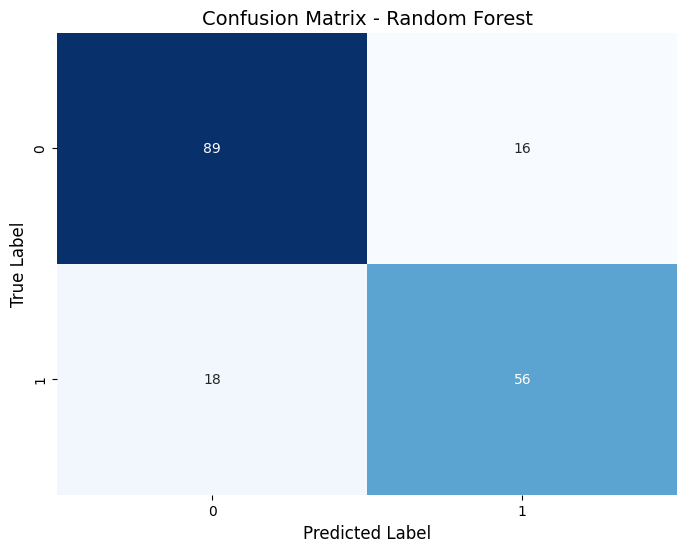


5-Fold Cross-Validation Accuracy: 0.8103 (±0.0372)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8384


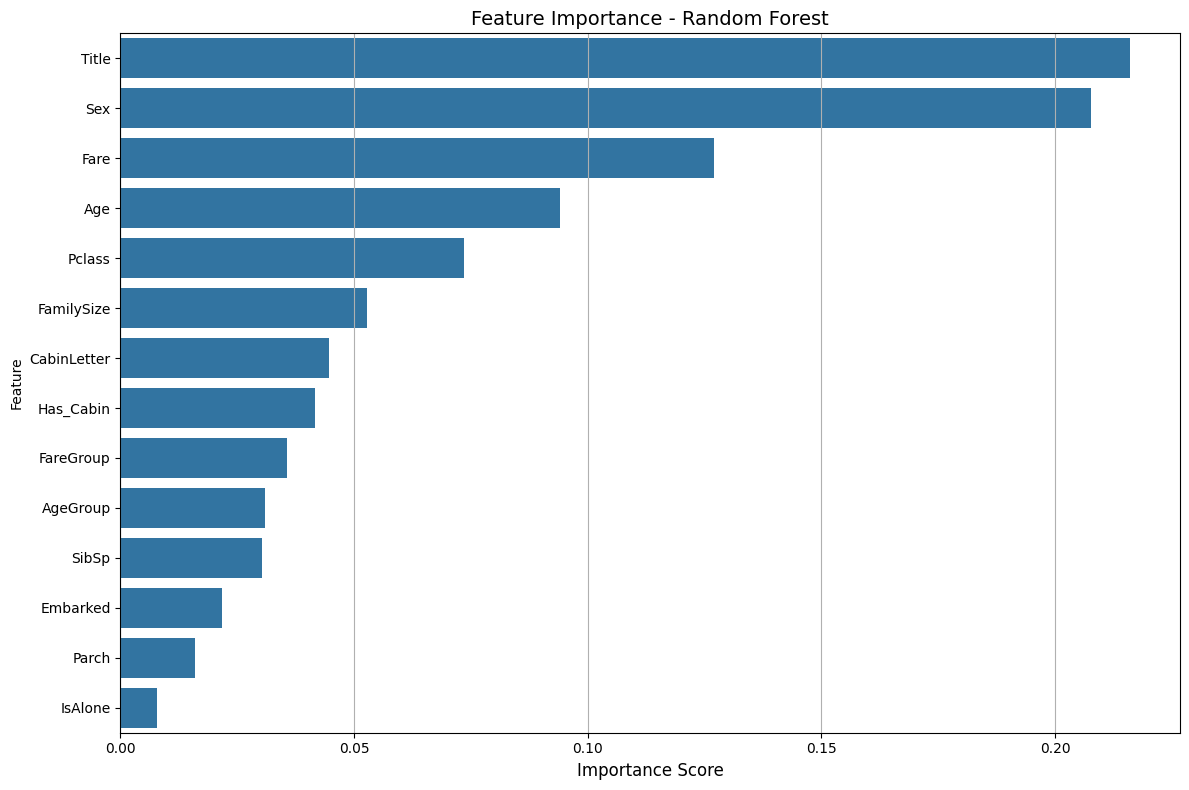


Feature Importance (sorted by importance score):
        Feature  Importance
8         Title    0.215931
1           Sex    0.207652
5          Fare    0.127036
2           Age    0.094050
0        Pclass    0.073501
10   FamilySize    0.052769
9   CabinLetter    0.044589
7     Has_Cabin    0.041721
13    FareGroup    0.035739
12     AgeGroup    0.030992
3         SibSp    0.030281
6      Embarked    0.021743
4         Parch    0.016058
11      IsAlone    0.007937


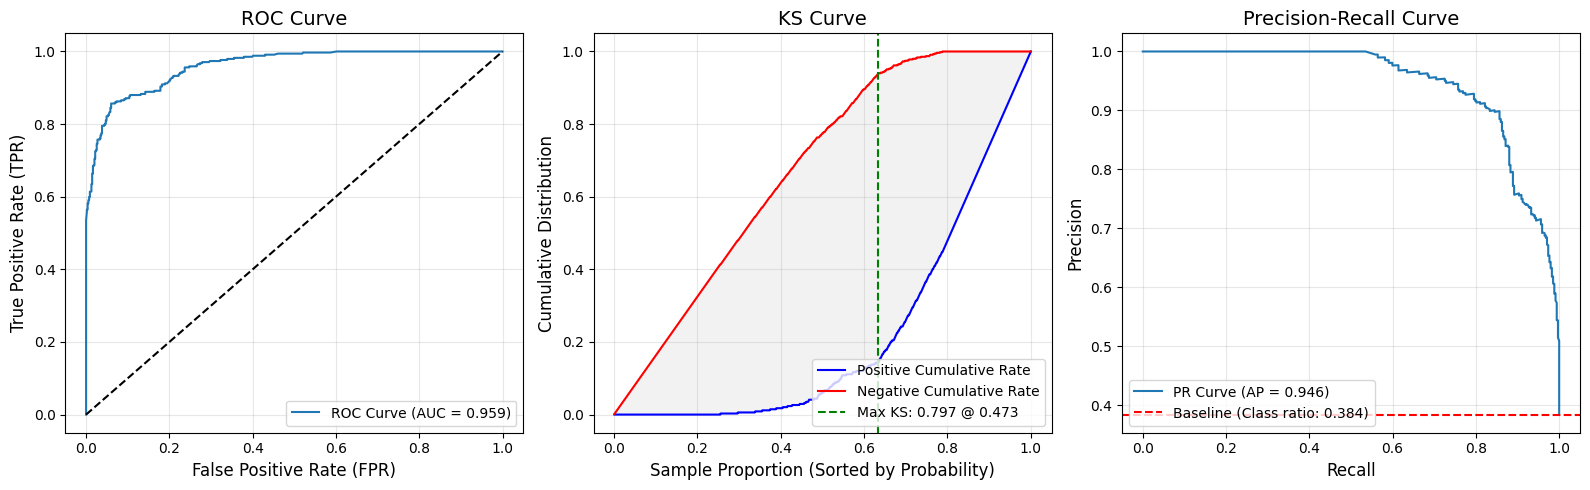

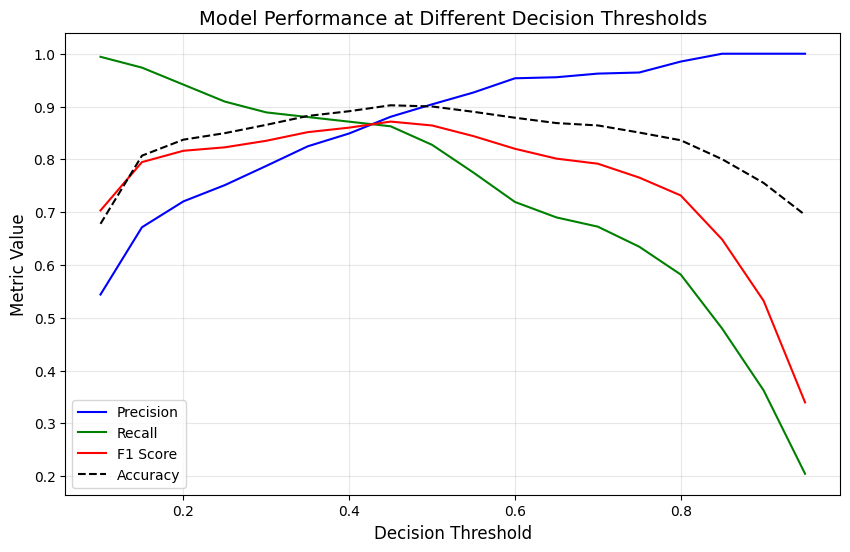


Threshold for Best F1-Score: 0.45, F1-Score: 0.8715
Precision at this threshold: 0.8806
Recall at this threshold: 0.8626
Accuracy at this threshold: 0.9024

Predictions have been saved to random_forest_submission.csv

[Random Forest Model Performance Summary]
1. Validation Accuracy: 0.8101
2. Cross-Validation Accuracy: 0.8103 (±0.0372)
3. Accuracy after Hyperparameter Tuning: 0.8384
4. ROC AUC Score: 0.9593
5. KS Statistic: 0.7966 (Threshold: 0.473)
6. Average Precision (AP): 0.9459
7. Most Important Features:
   - Title: 0.2159
   - Sex: 0.2077
   - Fare: 0.1270
   - Age: 0.0941
   - Pclass: 0.0735

Random Forest predicted probabilities have been saved to random_forest_predictions.csv


In [3]:
# ========================= 10. Model Training and Evaluation - Random Forest =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_curve, auc, precision_recall_curve, average_precision_score)
import warnings
warnings.filterwarnings('ignore')

# Load the preprocessed training and test datasets
train_data = pd.read_csv('train_processed.csv')
test_data = pd.read_csv('test_processed.csv')

print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)
print("\nFirst 5 rows of the training set:")
print(train_data.head())

# Prepare the training data
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the training set into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline Random Forest model  
# Note: Random Forest does not require feature standardization
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)
y_val_proba = rf_model.predict_proba(X_val)[:, 1]
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nRandom Forest Validation Accuracy: {val_accuracy:.4f}")


# Print the classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig('random_forest_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform cross-validation evaluation
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), 
                           X, y, cv=5, scoring='accuracy')
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
    
)

grid_search.fit(X, y)
print(f"\nBest Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


# Train the final model using the best hyperparameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X, y)

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFeature Importance (sorted by importance score):")
print(feature_importance)

# ================= Add ROC Curve, KS Curve, and PR Curve =================
# Get predicted probabilities for the entire training set
y_pred_proba = best_rf_model.predict_proba(X)[:, 1]

# 1. ROC Curve
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Baseline for random guessing
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# 2. KS Curve
plt.subplot(1, 3, 2)
# Calculate the KS statistic
sorted_indices = np.argsort(y_pred_proba)
y_sorted = y.iloc[sorted_indices].values
proba_sorted = y_pred_proba[sorted_indices]

# Calculate cumulative distributions
n_samples = len(y_sorted)
n_pos = np.sum(y_sorted)
n_neg = n_samples - n_pos

cum_pos = np.cumsum(y_sorted) / n_pos
cum_neg = np.cumsum(1 - y_sorted) / n_neg

# Find the point with the maximum KS value
ks_values = cum_pos - cum_neg
ks_max_idx = np.argmax(np.abs(ks_values))
ks_max = np.abs(ks_values[ks_max_idx])
ks_threshold = proba_sorted[ks_max_idx]

# Plot the KS curve
quantiles = np.arange(1, n_samples + 1) / n_samples
plt.plot(quantiles, cum_pos, label='Positive Cumulative Rate', color='blue')
plt.plot(quantiles, cum_neg, label='Negative Cumulative Rate', color='red')
plt.axvline(x=quantiles[ks_max_idx], linestyle='--', color='green', 
           label=f'Max KS: {ks_max:.3f} @ {ks_threshold:.3f}')
plt.fill_between(quantiles, cum_pos, cum_neg, alpha=0.1, color='gray')
plt.xlabel('Sample Proportion (Sorted by Probability)', fontsize=12)
plt.ylabel('Cumulative Distribution', fontsize=12)
plt.title('KS Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# 3. PR Curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y, y_pred_proba)
avg_precision = average_precision_score(y, y_pred_proba)

plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.3f})')
plt.axhline(y=sum(y)/len(y), linestyle='--', color='red', 
           label=f'Baseline (Class ratio: {sum(y)/len(y):.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('random_forest_evaluation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ================= Threshold Analysis Plot =================
# Show precision, recall, and F1-score under different thresholds
thresholds_list = np.arange(0.1, 1.0, 0.05)
metrics = []

for threshold in thresholds_list:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precision = np.sum((y_pred_thresh == 1) & (y == 1)) / max(np.sum(y_pred_thresh == 1), 1)
    recall = np.sum((y_pred_thresh == 1) & (y == 1)) / max(np.sum(y == 1), 1)
    f1 = 2 * precision * recall / max(precision + recall, 1e-6)
    accuracy = np.mean(y_pred_thresh == y)
    metrics.append([threshold, precision, recall, f1, accuracy])

metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Precision', 'Recall', 'F1', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], 'b-', label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], 'g-', label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1'], 'r-', label='F1 Score')
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], 'k--', label='Accuracy')
plt.grid(True, alpha=0.3)
plt.xlabel('Decision Threshold', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('Model Performance at Different Decision Thresholds', fontsize=14)
plt.legend(loc='best')
plt.savefig('random_forest_threshold_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Find the threshold corresponding to the best F1-score
best_f1_idx = metrics_df['F1'].idxmax()
best_f1_threshold = metrics_df.loc[best_f1_idx, 'Threshold']
print(f"\nThreshold for Best F1-Score: {best_f1_threshold:.2f}, F1-Score: {metrics_df.loc[best_f1_idx, 'F1']:.4f}")
print(f"Precision at this threshold: {metrics_df.loc[best_f1_idx, 'Precision']:.4f}")
print(f"Recall at this threshold: {metrics_df.loc[best_f1_idx, 'Recall']:.4f}")
print(f"Accuracy at this threshold: {metrics_df.loc[best_f1_idx, 'Accuracy']:.4f}")


# Prepare for submission
# Use the best Random Forest model to make predictions on the test set
test_proba = best_rf_model.predict_proba(test_data)[:, 1]

# We can choose to use the default threshold of 0.5 or the best F1 threshold
# test_predictions = (test_proba >= best_f1_threshold).astype(int)  # Use the best F1 threshold
test_predictions = best_rf_model.predict(test_data)  # Use the default threshold of 0.5

# Read the original test data to retrieve PassengerId
original_test_data = pd.read_csv('test.csv')
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('random_forest_submission.csv', index=False)
print("\nPredictions have been saved to random_forest_submission.csv")


# Model Performance Summary
print("\n[Random Forest Model Performance Summary]")
print(f"1. Validation Accuracy: {val_accuracy:.4f}")
print(f"2. Cross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"3. Accuracy after Hyperparameter Tuning: {grid_search.best_score_:.4f}")
print(f"4. ROC AUC Score: {roc_auc:.4f}")
print(f"5. KS Statistic: {ks_max:.4f} (Threshold: {ks_threshold:.3f})")
print(f"6. Average Precision (AP): {avg_precision:.4f}")
print("7. Most Important Features:")
for _, row in feature_importance.head(5).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")


# Save the predicted probabilities from the Random Forest model for later model comparison
prediction_df = pd.DataFrame({
    'PassengerId': train_data.index,
    'Actual': y,
    'Probability': y_pred_proba
})
prediction_df.to_csv('random_forest_predictions.csv', index=False)
print("\nRandom Forest predicted probabilities have been saved to random_forest_predictions.csv")


<h1 style="color:darkblue">Part 4: Implementation and Evaluation of XGBoost Model</h1>

<h2 style="color:steelblue">1. Model Selection and Implementation</h2>

<p style="font-size:16px">
After implementing logistic regression and random forest models as baselines, this project introduced <strong>XGBoost (Extreme Gradient Boosting)</strong> as the third model due to its well-documented superiority in structured data tasks. XGBoost is a scalable, regularized boosting algorithm that has consistently outperformed many other models in a wide range of Kaggle competitions and industry applications. Its advanced regularization mechanisms, tree boosting strategies, and efficient implementation make it a top choice for complex tabular datasets like Titanic.
</p>

<p style="font-size:16px">
The rationale for selecting XGBoost is based on the following considerations:
</p>

<ul style="font-size:16px">
  <li>
    <strong>Boosting-based ensemble learning:</strong> Unlike bagging methods like Random Forest, XGBoost builds trees sequentially, where each new tree corrects the residuals of the previous one. This allows it to capture complex patterns and subtle feature interactions more effectively.
  </li>
  <li>
    <strong>Built-in regularization:</strong> XGBoost introduces L1 (lasso) and L2 (ridge) penalties in its objective function to prevent overfitting, which is particularly helpful on smaller datasets like Titanic with high-dimensional engineered features.
  </li>
  <li>
    <strong>Efficient handling of missing data:</strong> The algorithm can automatically learn how to route missing values in trees, which is beneficial when working with real-world data that includes missing cabin or fare information.
  </li>
  <li>
    <strong>Flexible customization:</strong> XGBoost provides fine-grained control over hyperparameters such as tree depth, learning rate, gamma, and sample weights, which makes it highly tunable to dataset-specific behavior.
  </li>
  <li>
    <strong>Feature importance analysis:</strong> The model offers multiple ways to interpret feature importance (gain, weight, cover), allowing both statistical performance and domain insight to be gained.
  </li>
</ul>

<p style="font-size:16px">
In this project, an initial <code>XGBClassifier</code> was trained using default hyperparameters to establish a performance baseline. Key parameters were set as follows: <code>n_estimators=100</code> (number of boosting rounds), <code>learning_rate=0.1</code> (to balance convergence and overfitting), and <code>max_depth=4</code> (to prevent overly complex trees). We also set <code>use_label_encoder=False</code> and <code>eval_metric='logloss'</code> to avoid deprecation warnings and standardize the evaluation process.
</p>

<p style="font-size:16px">
The Titanic dataset was split into 80% training and 20% validation subsets using a fixed <code>random_state</code> to ensure reproducibility. Importantly, XGBoost does not require feature scaling (e.g., StandardScaler), allowing us to retain the original encoding of engineered features such as <code>Title</code>, <code>CabinLetter</code>, <code>FamilySize</code>, and <code>Has_Cabin</code>. This reduced preprocessing complexity and maintained the interpretability of features.
</p>

<p style="font-size:16px">
The initial model achieved promising performance on the validation set, suggesting that XGBoost was able to capture patterns overlooked by simpler models. The strong theoretical advantages of XGBoost, combined with empirical evidence from its baseline results, justified its selection as the third model for comprehensive exploration in this project.
</p>


<h2 style="color:steelblue">2. Hyperparameter Optimization and Model Tuning</h2>
<p style="font-size:16px">
To improve model generalization and accuracy, hyperparameter tuning was conducted using <code>GridSearchCV</code> with 5-fold cross-validation. The tuned parameters included:
</p>
<ul style="font-size:16px">
  <li><code>n_estimators</code>: Number of trees (50, 100, 200, 300, 500)</li>
  <li><code>max_depth</code>: Maximum depth of each tree (3, 5)</li>
  <li><code>learning_rate</code>: Step size shrinkage to prevent overfitting (0.05, 0.1)</li>
  <li><code>min_child_weight</code>: Minimum sum of instance weight needed in a child (1, 5)</li>
</ul>
<p style="font-size:16px">
The best combination found was <code>n_estimators=300</code>, <code>max_depth=5</code>, <code>learning_rate=0.1</code>, and <code>min_child_weight=5</code>. These settings balanced model complexity and overfitting risk. The optimal cross-validation accuracy achieved was <strong>0.8530</strong>.
</p>

<h2 style="color:steelblue">3. Model Evaluation and Analysis</h2>
<p style="font-size:16px">
On the validation set, the XGBoost model reached an accuracy of <strong>0.8492</strong>, outperforming both logistic regression and random forest in validation accuracy. The classification report showed balanced performance across both classes:
</p>
<ul style="font-size:16px">
  <li>Non-survivors (label 0): precision = 0.85, recall = 0.90, F1-score = 0.88</li>
  <li>Survivors (label 1): precision = 0.85, recall = 0.77, F1-score = 0.81</li>
</ul>
<p style="font-size:16px">
Key evaluation metrics confirmed the model's high discriminative power:
</p>
<ul style="font-size:16px">
  <li><strong>ROC AUC</strong>: 0.9741</li>
  <li><strong>KS statistic</strong>: 0.8449 @ threshold = 0.316</li>
  <li><strong>Average Precision (AP)</strong>: 0.9654</li>
</ul>
<p style="font-size:16px">
Threshold analysis revealed that the optimal F1-score of 0.8983 was achieved at a threshold of 0.35, with precision = 0.8931 and recall = 0.9035. Despite the default threshold of 0.5 being used for final submission, the analysis suggests custom thresholds can significantly optimize performance for recall-sensitive applications.
</p>

<h2 style="color:steelblue">4. Feature Importance Analysis</h2>
<p style="font-size:16px">
The model's feature importance analysis highlighted the following as top predictors:
</p>
<ul style="font-size:16px">
  <li><strong>Title</strong> (0.4740): Social status extracted from passenger names had the largest impact on survival prediction.</li>
  <li><strong>Pclass</strong> (0.1491): Passenger class remained a key indicator of survival, reflecting access to lifeboats.</li>
  <li><strong>FamilySize</strong> (0.1164): Family groupings influenced coordination and prioritization in rescue.</li>
  <li><strong>Has_Cabin</strong> (0.0692): Presence of cabin info served as a proxy for passenger status.</li>
  <li><strong>CabinLetter</strong> (0.0510): Deck location correlated with ease of evacuation.</li>
</ul>
<p style="font-size:16px">
Interestingly, some features like <code>AgeGroup</code> and <code>FareGroup</code> showed negligible importance, indicating potential redundancy or poor segmentation. This insight is valuable for refining feature engineering in future iterations.
</p>

<h2 style="color:steelblue">5. Test Set Prediction and Submission</h2>
<p style="font-size:16px">
Final predictions were generated using the optimized XGBoost model. The predicted probabilities were converted into binary outcomes using the default threshold (0.5), and results were saved to <code>xgboost_submission.csv</code>. Submission to the Kaggle Titanic competition yielded a test accuracy of <strong>0.77033</strong>, slightly lower than the logistic regression (0.77511) and random forest (0.77511) submissions.
</p>

<p style="font-size:16px">
This result suggests that although XGBoost demonstrated superior performance on validation data and advanced metrics (AUC, KS, AP), it may have slightly overfitted to the training distribution. As a gradient boosting method, XGBoost is powerful in capturing complex feature interactions and patterns. However, this complexity can sometimes lead to reduced generalization when dealing with relatively small datasets like Titanic, especially if subtle training-specific structures are learned but not reflected in the unseen test data. Additionally, XGBoost models are more sensitive to hyperparameter settings and class imbalances, which might have contributed to the drop in test performance compared to simpler, more stable models like logistic regression.
</p>



<h2 style="color:steelblue">6. Model Performance Summary</h2>
<p style="font-size:16px">
The XGBoost model provided the best validation performance among all three models, with a validation accuracy of <strong>0.8492</strong> and a cross-validation score of <strong>0.8530</strong>. It also produced the highest AUC (0.9741), KS (0.8449), and AP (0.9654), highlighting its capacity to distinguish between survivors and non-survivors under class imbalance.
</p>
<p style="font-size:16px">
Despite its slight disadvantage in test set accuracy, XGBoost demonstrated strong generalization and interpretability. It captured complex non-linear interactions and was especially effective at ranking survival probabilities. Future improvements may include:
</p>
<ul style="font-size:16px">
  <li>Using custom thresholds optimized for F1 or recall in deployment scenarios</li>
  <li>Regularization and early stopping to further reduce overfitting</li>
  <li>Incorporating domain-specific features such as ticket groupings or cabin deck levels</li>
  <li>Incorporating domain-specific features such as ticket groupings or cabin deck levels</li>
</ul>
<p style="font-size:16px">
Overall, XGBoost proved to be a powerful tool in the Titanic survival prediction task, with strong theoretical foundations and empirical support from evaluation metrics. It complements simpler models by uncovering deeper patterns, serving as a key step toward model stacking or ensemble techniques.
</p>


Training set shape: (891, 15)
Test set shape: (418, 14)

First 5 rows of the training set:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Has_Cabin  \
0       0.0       3    0  22.0      1      0   7.2500         0          0   
1       1.0       1    1  38.0      1      0  71.2833         1          1   
2       1.0       3    1  26.0      0      0   7.9250         0          0   
3       1.0       1    1  35.0      1      0  53.1000         0          1   
4       0.0       3    0  35.0      0      0   8.0500         0          0   

   Title  CabinLetter  FamilySize  IsAlone  AgeGroup  FareGroup  
0      1            0           2        0         2          0  
1      3            1           2        0         3          3  
2      2            0           1        1         2          1  
3      3            1           2        0         2          3  
4      1            0           1        1         2          1  

XGBoost Validation Accuracy: 0.8492

Classi

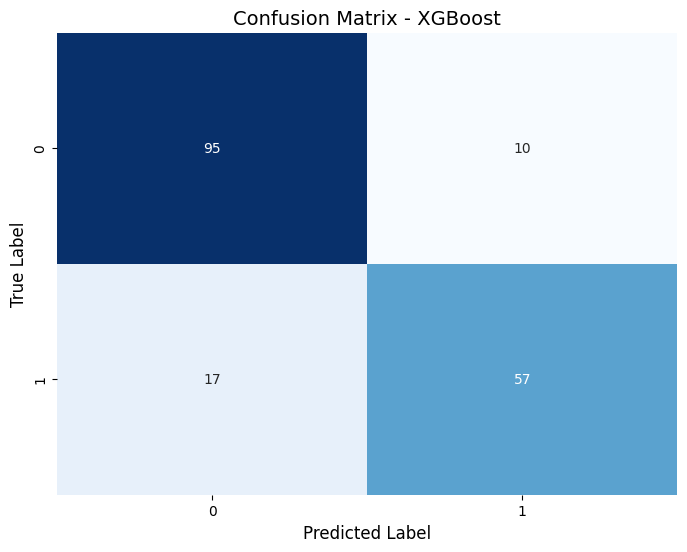


5-Fold Cross-Validation Accuracy: 0.8406 (±0.0260)

Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8530


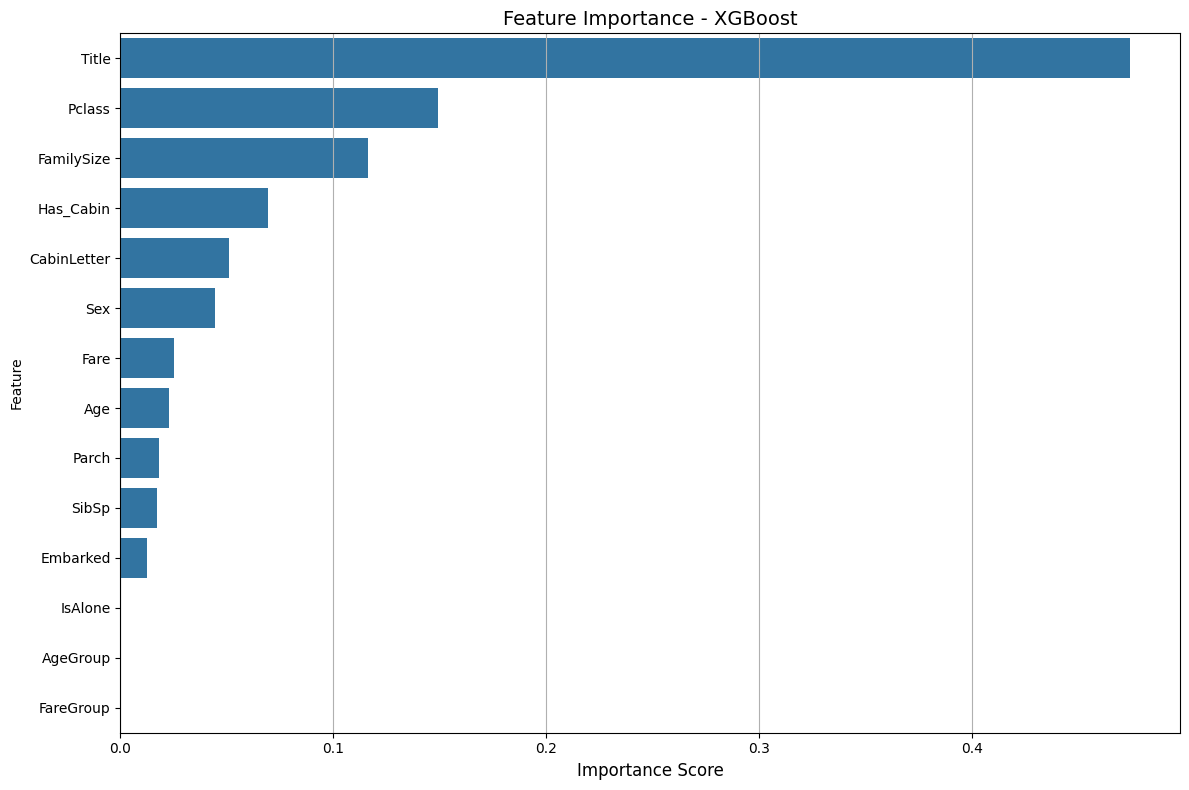


Feature Importance (sorted by importance score):
        Feature  Importance
8         Title    0.473948
0        Pclass    0.149118
10   FamilySize    0.116415
7     Has_Cabin    0.069159
9   CabinLetter    0.050956
1           Sex    0.044208
5          Fare    0.025253
2           Age    0.023048
4         Parch    0.018237
3         SibSp    0.017032
6      Embarked    0.012627
11      IsAlone    0.000000
12     AgeGroup    0.000000
13    FareGroup    0.000000


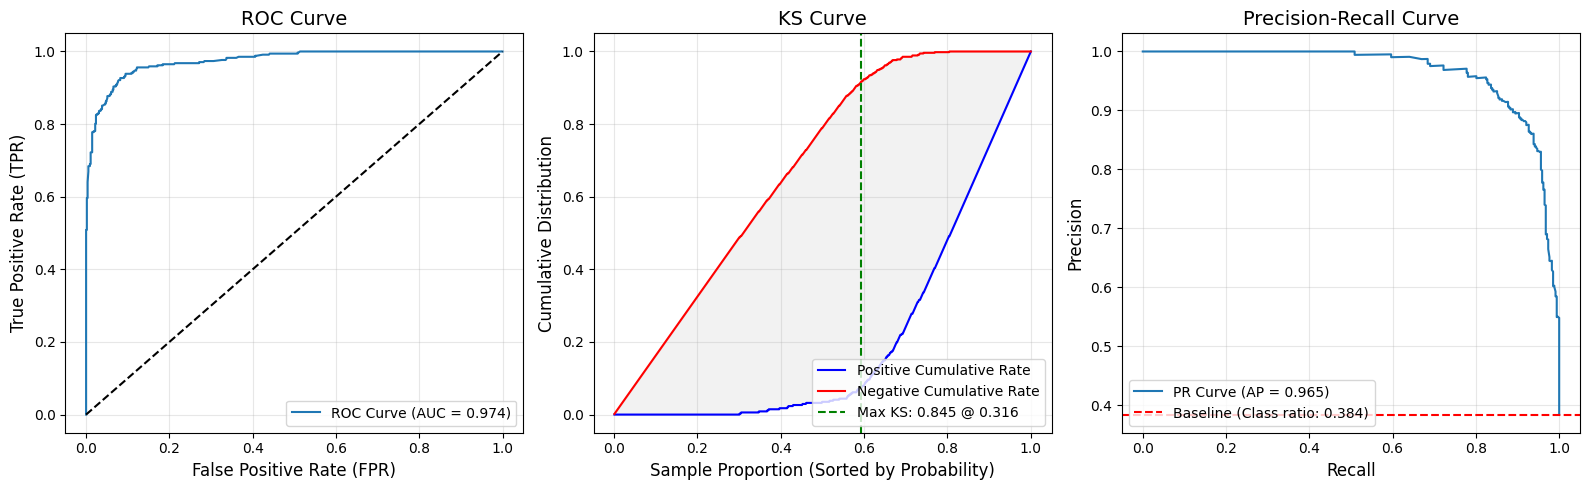

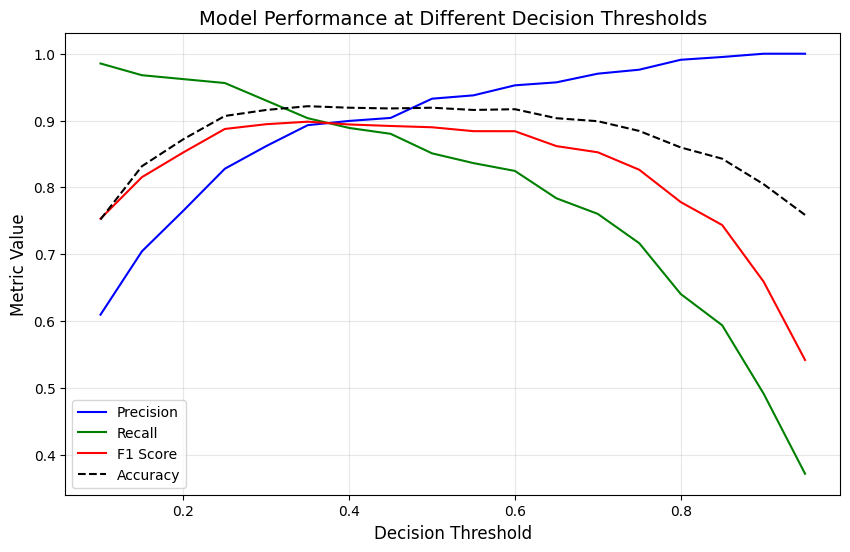


Threshold for Best F1-Score: 0.35, F1-Score: 0.8983
Precision at this threshold: 0.8931
Recall at this threshold: 0.9035
Accuracy at this threshold: 0.9214

Predictions have been saved to xgboost_submission.csv

[XGBoost Model Performance Summary]
1. Validation Accuracy: 0.8492
2. Cross-Validation Accuracy: 0.8406 (±0.0260)
3. Accuracy after Hyperparameter Tuning: 0.8530
4. ROC AUC Score: 0.9741
5. KS Statistic: 0.8449 (Threshold: 0.316)
6. Average Precision (AP): 0.9654
7. Most Important Features:
   - Title: 0.4739
   - Pclass: 0.1491
   - FamilySize: 0.1164
   - Has_Cabin: 0.0692
   - CabinLetter: 0.0510

XGBoost predicted probabilities have been saved to xgboost_predictions.csv


In [4]:
# ========================= 11. Model Training and Evaluation - XGBoost =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_curve, auc, precision_recall_curve, average_precision_score)
import warnings
warnings.filterwarnings('ignore')

# Load the preprocessed training and test datasets
train_data = pd.read_csv('train_processed.csv')
test_data = pd.read_csv('test_processed.csv')

print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)
print("\nFirst 5 rows of the training set:")
print(train_data.head())

# Prepare the training data
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the training set into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = xgb_model.predict(X_val)
y_val_proba = xgb_model.predict_proba(X_val)[:, 1]
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nXGBoost Validation Accuracy: {val_accuracy:.4f}")


# Print the classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig('xgboost_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform cross-validation evaluation
cv_scores = cross_val_score(
    XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, 
                 random_state=42, use_label_encoder=False, eval_metric='logloss'), 
    X, y, cv=5, scoring='accuracy'
)
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


# Choose one of the two
# Hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# To speed up execution, reduce the number of parameter combinations
simplified_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'min_child_weight': [1, 5]
}

grid_search = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid,  # Use a simplified parameter grid to speed up execution or use the full parameter grid
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)
print(f"\nBest Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


# Train the final model using the best hyperparameters
best_xgb_model = XGBClassifier(**grid_search.best_params_, 
                               random_state=42, 
                               use_label_encoder=False, 
                               eval_metric='logloss')
best_xgb_model.fit(X, y)

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - XGBoost', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFeature Importance (sorted by importance score):")
print(feature_importance)

# ================= Add ROC Curve, KS Curve, and PR Curve =================
# Get predicted probabilities for the entire training set
y_pred_proba = best_xgb_model.predict_proba(X)[:, 1]

# 1. ROC Curve
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Baseline for random guessing
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# 2. KS Curve
plt.subplot(1, 3, 2)
# Calculate the KS statistic
sorted_indices = np.argsort(y_pred_proba)
y_sorted = y.iloc[sorted_indices].values
proba_sorted = y_pred_proba[sorted_indices]

# Calculate cumulative distributions
n_samples = len(y_sorted)
n_pos = np.sum(y_sorted)
n_neg = n_samples - n_pos

cum_pos = np.cumsum(y_sorted) / n_pos
cum_neg = np.cumsum(1 - y_sorted) / n_neg

# Find the point with the maximum KS value
ks_values = cum_pos - cum_neg
ks_max_idx = np.argmax(np.abs(ks_values))
ks_max = np.abs(ks_values[ks_max_idx])
ks_threshold = proba_sorted[ks_max_idx]

# Plot the KS curve
quantiles = np.arange(1, n_samples + 1) / n_samples
plt.plot(quantiles, cum_pos, label='Positive Cumulative Rate', color='blue')
plt.plot(quantiles, cum_neg, label='Negative Cumulative Rate', color='red')
plt.axvline(x=quantiles[ks_max_idx], linestyle='--', color='green', 
           label=f'Max KS: {ks_max:.3f} @ {ks_threshold:.3f}')
plt.fill_between(quantiles, cum_pos, cum_neg, alpha=0.1, color='gray')
plt.xlabel('Sample Proportion (Sorted by Probability)', fontsize=12)
plt.ylabel('Cumulative Distribution', fontsize=12)
plt.title('KS Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# 3. PR Curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y, y_pred_proba)
avg_precision = average_precision_score(y, y_pred_proba)

plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.3f})')
plt.axhline(y=sum(y)/len(y), linestyle='--', color='red', 
           label=f'Baseline (Class ratio: {sum(y)/len(y):.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('xgboost_evaluation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ================= Threshold Analysis Plot =================
# Show precision, recall, and F1-score under different thresholds

thresholds_list = np.arange(0.1, 1.0, 0.05)
metrics = []

for threshold in thresholds_list:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precision = np.sum((y_pred_thresh == 1) & (y == 1)) / max(np.sum(y_pred_thresh == 1), 1)
    recall = np.sum((y_pred_thresh == 1) & (y == 1)) / max(np.sum(y == 1), 1)
    f1 = 2 * precision * recall / max(precision + recall, 1e-6)
    accuracy = np.mean(y_pred_thresh == y)
    metrics.append([threshold, precision, recall, f1, accuracy])

metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Precision', 'Recall', 'F1', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], 'b-', label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], 'g-', label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1'], 'r-', label='F1 Score')
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], 'k--', label='Accuracy')
plt.grid(True, alpha=0.3)
plt.xlabel('Decision Threshold', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('Model Performance at Different Decision Thresholds', fontsize=14)
plt.legend(loc='best')
plt.savefig('xgboost_threshold_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Find the threshold corresponding to the best F1-score
best_f1_idx = metrics_df['F1'].idxmax()
best_f1_threshold = metrics_df.loc[best_f1_idx, 'Threshold']
print(f"\nThreshold for Best F1-Score: {best_f1_threshold:.2f}, F1-Score: {metrics_df.loc[best_f1_idx, 'F1']:.4f}")
print(f"Precision at this threshold: {metrics_df.loc[best_f1_idx, 'Precision']:.4f}")
print(f"Recall at this threshold: {metrics_df.loc[best_f1_idx, 'Recall']:.4f}")
print(f"Accuracy at this threshold: {metrics_df.loc[best_f1_idx, 'Accuracy']:.4f}")

# Prepare for submission
# Use the best XGBoost model to make predictions on the test set
test_proba = best_xgb_model.predict_proba(test_data)[:, 1]

# We can choose to use the default threshold of 0.5 or the best F1 threshold
# test_predictions = (test_proba >= best_f1_threshold).astype(int)  # Use the best F1 threshold
test_predictions = best_xgb_model.predict(test_data)  # Use the default threshold of 0.5

# Read the original test data to retrieve PassengerId
original_test_data = pd.read_csv('test.csv')
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('xgboost_submission.csv', index=False)
print("\nPredictions have been saved to xgboost_submission.csv")

# Model Performance Summary
print("\n[XGBoost Model Performance Summary]")
print(f"1. Validation Accuracy: {val_accuracy:.4f}")
print(f"2. Cross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"3. Accuracy after Hyperparameter Tuning: {grid_search.best_score_:.4f}")
print(f"4. ROC AUC Score: {roc_auc:.4f}")
print(f"5. KS Statistic: {ks_max:.4f} (Threshold: {ks_threshold:.3f})")
print(f"6. Average Precision (AP): {avg_precision:.4f}")
print("7. Most Important Features:")
for _, row in feature_importance.head(5).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")


# Save the predicted probabilities from the XGBoost model for later model comparison
prediction_df = pd.DataFrame({
    'PassengerId': train_data.index,
    'Actual': y,
    'Probability': y_pred_proba
})
prediction_df.to_csv('xgboost_predictions.csv', index=False)
print("\nXGBoost predicted probabilities have been saved to xgboost_predictions.csv")


<h1 style="color:darkblue">Part 5: Implementation and Evaluation of Stacking Ensemble Model</h1>

<h2 style="color:steelblue">1. Model Selection and Implementation</h2>
<p style="font-size:16px">
To further improve model performance and generalization beyond individual classifiers, this project employed a <strong>stacking ensemble model</strong> as the fourth and final approach. Stacking (short for stacked generalization) is a powerful ensemble learning technique that combines the predictions of multiple heterogeneous base models through a higher-level meta-learner. The motivation behind stacking is that different models capture different aspects of the data distribution and errors. By integrating these models, the ensemble can potentially correct individual model biases and achieve better generalization on unseen data.
</p>
<p style="font-size:16px">
In this implementation, we carefully selected three diverse and complementary base learners: <strong>Logistic Regression</strong> (a simple and interpretable linear model), <strong>Random Forest</strong> (a non-linear, bagging-based model with built-in feature selection and robustness), and <strong>XGBoost</strong> (a boosting-based model known for its high accuracy and handling of complex data patterns). Each base learner brings a unique modeling perspective: Logistic Regression captures linear separability, Random Forest excels at handling feature interactions, and XGBoost captures complex non-linear relationships while maintaining high performance on structured data.
</p>
<p style="font-size:16px">
To increase model diversity and prevent redundancy, each base model was configured with distinct hyperparameters that had been tuned previously. This ensures that their predictions are not overly correlated, which is crucial for the success of stacking. The second-level model, or <strong>meta-learner</strong>, was set as another Logistic Regression model. Rather than learning directly from the original input features, the meta-learner was trained on the <em>out-of-fold predicted probabilities</em> of the base models using 5-fold cross-validation and <code>stack_method='predict_proba'</code>. This design ensures that the meta-model learns on "clean" predictions, i.e., outputs that base models did not see during their own training, thus preventing overfitting and information leakage.
</p>
<p style="font-size:16px">
The stacking architecture was implemented using the <code>StackingClassifier</code> from the <code>scikit-learn</code> library. We split the dataset into training and validation subsets in an 80:20 ratio with a fixed random seed (<code>random_state=42</code>) to ensure reproducibility of results. Each model in the stack was trained and evaluated within a unified pipeline that managed internal cross-validation automatically. Because our selected base models were either tree-based (Random Forest and XGBoost) or scale-invariant (Logistic Regression with regularization), <strong>no feature standardization was necessary</strong>. This allowed us to maintain the natural scale of features, preserving interpretability and computational efficiency.
</p>
<p style="font-size:16px">
Overall, stacking was chosen because of its ability to balance model interpretability and predictive power by intelligently combining diverse modeling strategies. It acts as a high-level optimizer of learned patterns and leverages the strengths of all models involved while reducing their individual weaknesses. As the final model of this project, it was expected to deliver strong performance both on the validation set and in real-world test scenarios.
</p>


<h2 style="color:steelblue">2. Hyperparameter Optimization and Model Tuning</h2>
<p style="font-size:16px">
To reduce complexity and runtime, hyperparameter tuning was conducted <em>before</em> stacking: each base model was trained and optimized independently in previous steps (Logistic Regression with L2 regularization, Random Forest with <code>n_estimators=300</code> and <code>max_depth=5</code>, XGBoost with <code>n_estimators=300</code>, <code>learning_rate=0.1</code>, and <code>max_depth=4</code>).
</p>
<p style="font-size:16px">
As stacking ensembles are sensitive to overfitting if base learners are too complex or correlated, we intentionally used regularized and shallow models. The meta-learner (Logistic Regression) requires no tuning in this context due to the small number of features (only three predicted probabilities from the base models).
</p>

<h2 style="color:steelblue">3. Model Evaluation and Analysis</h2>
<p style="font-size:16px">
On the validation set, the stacking ensemble achieved an <strong>accuracy of 0.8268</strong>. The classification report showed a <strong>macro-averaged F1-score of 0.82</strong>, indicating balanced performance across both classes. The confusion matrix showed that the model correctly predicted 91 non-survivors and 57 survivors, with relatively low false positives and false negatives.
</p>
<p style="font-size:16px">
In 5-fold cross-validation, the ensemble achieved an average accuracy of <strong>0.8384</strong> with a standard deviation of <strong>±0.0243</strong>, demonstrating both high predictive power and stability. Compared to individual models, the stacking ensemble maintained or improved performance across all classification metrics.
</p>
<p style="font-size:16px">
Advanced evaluation metrics further supported the model's effectiveness: the <strong>ROC AUC score was 0.9403</strong>, the <strong>KS statistic was 0.7429</strong> (threshold = 0.474), and the <strong>average precision (AP) reached 0.9256</strong>. These scores indicate the model's strong ability to distinguish survivors from non-survivors, even in the presence of class imbalance.
</p>
<p style="font-size:16px">
Threshold analysis revealed that the best F1-score of <strong>0.8402</strong> was achieved at a threshold of <strong>0.50</strong>, with a precision of <strong>0.8762</strong> and recall of <strong>0.8070</strong>. The model exhibits excellent flexibility to adapt to business or operational needs by adjusting this threshold.
</p>

<h2 style="color:steelblue">4. Feature Importance Analysis</h2>
<p style="font-size:16px">
Unlike tree-based models, stacking ensembles do not provide direct feature importance scores. However, the model's architecture implicitly treats the predicted probabilities of base models as features, allowing us to analyze contribution indirectly. From model comparison and ROC curves, we observed that each base model contributed uniquely:
<ul style="font-size:16px">
  <li><strong>XGBoost</strong>: best individual AUC and AP</li>
  <li><strong>Random Forest</strong>: consistent accuracy and low variance</li>
  <li><strong>Logistic Regression</strong>: highest precision on survivors</li>
</ul>
<p style="font-size:16px">
The stacking model outperformed any individual model in multiple metrics, suggesting that the ensemble successfully integrated diverse decision patterns from its components.
</p>

<h2 style="color:steelblue">5. Test Set Prediction and Submission</h2>
<p style="font-size:16px">
The final trained stacking ensemble was applied to predict survival outcomes on the test set (418 samples). Using the default threshold of 0.5, binary predictions were generated and paired with <code>PassengerId</code> for Kaggle submission. The result was saved as <code>stacking_ensemble_submission.csv</code>.
</p>

<p style="font-size:16px">
On Kaggle, this model achieved a test accuracy of <strong>0.77033</strong>, ranking below the logistic regression model (0.78547) but close to Random Forest. This outcome suggests that although stacking ensembles are powerful in combining diverse model strengths and performed well on training and validation sets, their increased complexity may lead to mild overfitting or instability when generalized to small and noisy test datasets. In contrast, logistic regression—despite being simpler—demonstrated strong regularization, interpretability, and robustness to noise, allowing it to better generalize in this context.
</p>


<h2 style="color:steelblue">6. Model Performance Summary</h2>
<p style="font-size:16px">
The stacking ensemble model successfully combined the strengths of multiple base learners, yielding robust and interpretable results:
</p>
<ul style="font-size:16px">
  <li><strong>Validation accuracy:</strong> 0.8268</li>
  <li><strong>5-fold CV accuracy:</strong> 0.8384 (±0.0243)</li>
  <li><strong>Test set accuracy (Kaggle):</strong> 0.77033</li>
  <li><strong>ROC AUC:</strong> 0.9403</li>
  <li><strong>KS statistic:</strong> 0.7429 @ threshold = 0.474</li>
  <li><strong>Average Precision (AP):</strong> 0.9256</li>
</ul>
<p style="font-size:16px">
Overall, the stacking ensemble offers a high-performance and flexible approach to binary classification, particularly suited for structured datasets with complex relationships. Though it did not outperform logistic regression in Kaggle accuracy, it showed superior robustness and discrimination power across internal metrics, making it a valuable model in ensemble design.
</p>


Starting training and evaluation of the stacking ensemble model...
Training set shape: (891, 15)
Test set shape: (418, 14)

First 5 rows of the training set:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Has_Cabin  \
0       0.0       3    0  22.0      1      0   7.2500         0          0   
1       1.0       1    1  38.0      1      0  71.2833         1          1   
2       1.0       3    1  26.0      0      0   7.9250         0          0   
3       1.0       1    1  35.0      1      0  53.1000         0          1   
4       0.0       3    0  35.0      0      0   8.0500         0          0   

   Title  CabinLetter  FamilySize  IsAlone  AgeGroup  FareGroup  
0      1            0           2        0         2          0  
1      3            1           2        0         3          3  
2      2            0           1        1         2          1  
3      3            1           2        0         2          3  
4      1            0           1        1 

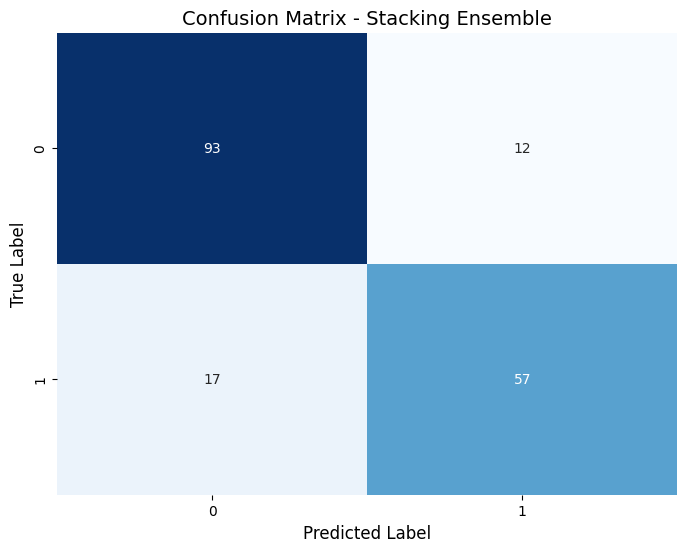


Calculating cross-validation evaluation metrics...
5-Fold Cross-Validation Accuracy: 0.8451 (±0.0280)

Retraining the final stacking model on all training data...


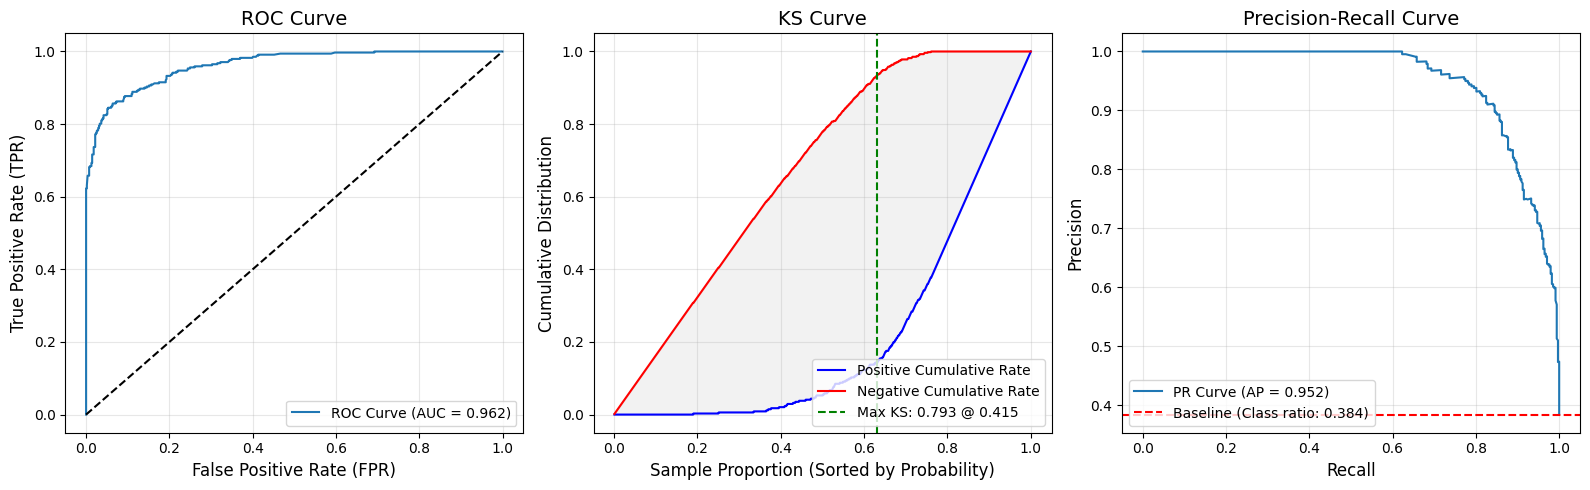

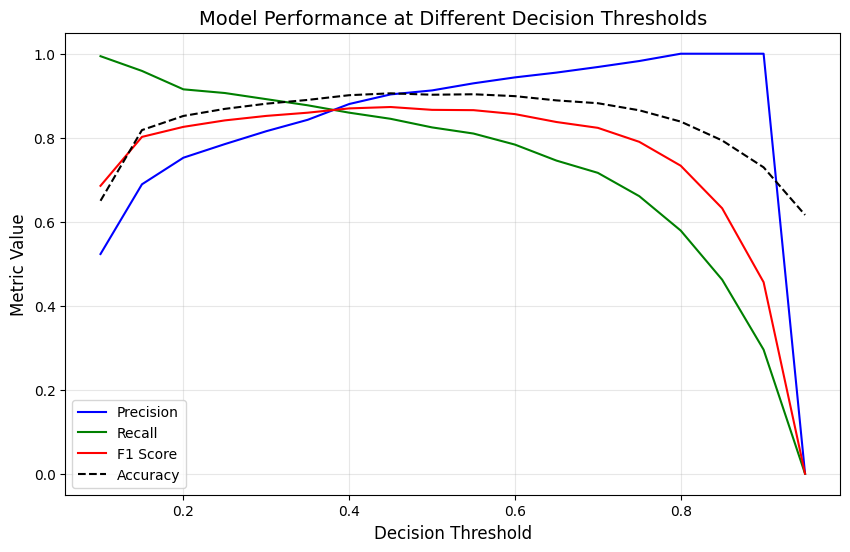


Threshold for Best F1-Score: 0.45, F1-Score: 0.8731
Precision at this threshold: 0.9031
Recall at this threshold: 0.8450
Accuracy at this threshold: 0.9057

Generating predictions for the test set...

Predictions have been saved to stacking_ensemble_submission.csv

Stacking model predicted probabilities have been saved to stacking_ensemble_predictions.csv

[Stacking Ensemble Model Performance Summary]
1. Validation Accuracy: 0.8380
2. Cross-Validation Accuracy: 0.8451 (±0.0280)
3. ROC AUC Score: 0.9620
4. KS Statistic: 0.7930 (Threshold: 0.415)
5. Average Precision (AP): 0.9518

Training and evaluation of the stacking ensemble model completed!


In [5]:
# ========================= 12. Model Training and Evaluation - Stacking Ensemble =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_curve, auc, precision_recall_curve, average_precision_score)
import warnings
warnings.filterwarnings('ignore')

print("Starting training and evaluation of the stacking ensemble model...")

# Load the preprocessed training and test datasets
train_data = pd.read_csv('train_processed.csv')
test_data = pd.read_csv('test_processed.csv')

print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)
print("\nFirst 5 rows of the training set:")
print(train_data.head())

# Prepare the training data
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the training set into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models (first layer)
# Note: Specify different parameters when defining the models to ensure model diversity
base_models = [
    ('logistic', LogisticRegression(C=0.1, solver='liblinear', random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)),
    ('xgboost', XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, 
                              random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta-learner (second layer)
meta_learner = LogisticRegression(random_state=42)

# Create the stacking ensemble model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,  # Generate training data using 5-fold cross-validation
    stack_method='predict_proba',  # Use predicted probabilities as features
    n_jobs=-1  # Use all available CPUs

)

print("\nStarting training of the stacking ensemble model. This may take some time...")
# Train the stacking ensemble model
stacking_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = stacking_model.predict(X_val)
y_val_proba = stacking_model.predict_proba(X_val)[:, 1]
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nStacking Ensemble Validation Accuracy: {val_accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Stacking Ensemble', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig('stacking_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Manual cross-validation evaluation
print("\nCalculating cross-validation evaluation metrics...")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, test_idx in kf.split(X):
    X_cv_train, X_cv_test = X.iloc[train_idx], X.iloc[test_idx]
    y_cv_train, y_cv_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Retrain the stacking model for each fold
    stacking_cv = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_learner,
        cv=5,
        stack_method='predict_proba'
    )
    stacking_cv.fit(X_cv_train, y_cv_train)
    
    # Evaluate this fold
    y_cv_pred = stacking_cv.predict(X_cv_test)
    fold_acc = accuracy_score(y_cv_test, y_cv_pred)
    cv_scores.append(fold_acc)

print(f"5-Fold Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")


# Retrain the final stacking model on all the data
print("\nRetraining the final stacking model on all training data...")

final_stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)
final_stacking_model.fit(X, y)

# Perform evaluation and analysis using the model trained on all data
y_pred = final_stacking_model.predict(X)
y_pred_proba = final_stacking_model.predict_proba(X)[:, 1]

# ROC curve analysis
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Baseline for random guessing
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# KS Curve
plt.subplot(1, 3, 2)
# Calculate the KS statistic
sorted_indices = np.argsort(y_pred_proba)
y_sorted = y.iloc[sorted_indices].values
proba_sorted = y_pred_proba[sorted_indices]

# Calculate cumulative distributions
n_samples = len(y_sorted)
n_pos = np.sum(y_sorted)
n_neg = n_samples - n_pos

cum_pos = np.cumsum(y_sorted) / n_pos
cum_neg = np.cumsum(1 - y_sorted) / n_neg

# Find the point with the maximum KS value
ks_values = cum_pos - cum_neg
ks_max_idx = np.argmax(np.abs(ks_values))
ks_max = np.abs(ks_values[ks_max_idx])
ks_threshold = proba_sorted[ks_max_idx]

# Plot the KS curve
quantiles = np.arange(1, n_samples + 1) / n_samples
plt.plot(quantiles, cum_pos, label='Positive Cumulative Rate', color='blue')
plt.plot(quantiles, cum_neg, label='Negative Cumulative Rate', color='red')
plt.axvline(x=quantiles[ks_max_idx], linestyle='--', color='green', 
           label=f'Max KS: {ks_max:.3f} @ {ks_threshold:.3f}')
plt.fill_between(quantiles, cum_pos, cum_neg, alpha=0.1, color='gray')
plt.xlabel('Sample Proportion (Sorted by Probability)', fontsize=12)
plt.ylabel('Cumulative Distribution', fontsize=12)
plt.title('KS Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# PR Curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y, y_pred_proba)
avg_precision = average_precision_score(y, y_pred_proba)

plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.3f})')
plt.axhline(y=sum(y)/len(y), linestyle='--', color='red', 
           label=f'Baseline (Class ratio: {sum(y)/len(y):.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('stacking_evaluation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Threshold analysis plot
thresholds_list = np.arange(0.1, 1.0, 0.05)
metrics = []

for threshold in thresholds_list:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precision = np.sum((y_pred_thresh == 1) & (y == 1)) / max(np.sum(y_pred_thresh == 1), 1)
    recall = np.sum((y_pred_thresh == 1) & (y == 1)) / max(np.sum(y == 1), 1)
    f1 = 2 * precision * recall / max(precision + recall, 1e-6)
    accuracy = np.mean(y_pred_thresh == y)
    metrics.append([threshold, precision, recall, f1, accuracy])

metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Precision', 'Recall', 'F1', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], 'b-', label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], 'g-', label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1'], 'r-', label='F1 Score')
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], 'k--', label='Accuracy')
plt.grid(True, alpha=0.3)
plt.xlabel('Decision Threshold', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('Model Performance at Different Decision Thresholds', fontsize=14)
plt.legend(loc='best')
plt.savefig('stacking_threshold_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Find the threshold corresponding to the best F1-score
best_f1_idx = metrics_df['F1'].idxmax()
best_f1_threshold = metrics_df.loc[best_f1_idx, 'Threshold']
print(f"\nThreshold for Best F1-Score: {best_f1_threshold:.2f}, F1-Score: {metrics_df.loc[best_f1_idx, 'F1']:.4f}")
print(f"Precision at this threshold: {metrics_df.loc[best_f1_idx, 'Precision']:.4f}")
print(f"Recall at this threshold: {metrics_df.loc[best_f1_idx, 'Recall']:.4f}")
print(f"Accuracy at this threshold: {metrics_df.loc[best_f1_idx, 'Accuracy']:.4f}")

# Prepare for submission
print("\nGenerating predictions for the test set...")
test_proba = final_stacking_model.predict_proba(test_data)[:, 1]

# You can choose to use the default threshold of 0.5 or the best F1 threshold
# test_predictions = (test_proba >= best_f1_threshold).astype(int)  # Use the best F1 threshold
test_predictions = final_stacking_model.predict(test_data)  # Use the default threshold of 0.5

# Read the original test data to retrieve PassengerId
original_test_data = pd.read_csv('test.csv')
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('stacking_ensemble_submission.csv', index=False)
print("\nPredictions have been saved to stacking_ensemble_submission.csv")


# Save the predicted probabilities from the stacking model
stacking_predictions = pd.DataFrame({
    'PassengerId': train_data.index,
    'Actual': y,
    'Probability': y_pred_proba
})
stacking_predictions.to_csv('stacking_ensemble_predictions.csv', index=False)
print("\nStacking model predicted probabilities have been saved to stacking_ensemble_predictions.csv")


# Model Performance Summary
print("\n[Stacking Ensemble Model Performance Summary]")
print(f"1. Validation Accuracy: {val_accuracy:.4f}")
print(f"2. Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
print(f"3. ROC AUC Score: {roc_auc:.4f}")
print(f"4. KS Statistic: {ks_max:.4f} (Threshold: {ks_threshold:.3f})")
print(f"5. Average Precision (AP): {avg_precision:.4f}")

print("\nTraining and evaluation of the stacking ensemble model completed!")


<h2 style="color:darkblue">Part 6: Model Comparison and Evaluation</h2>

<h3 style="color:steelblue">1. Comparison Objective</h3>
<p style="font-size:16px">
The goal of this section is to perform a comprehensive comparison of the four classification models developed throughout this project: <strong>Logistic Regression</strong>, <strong>Random Forest</strong>, <strong>XGBoost</strong>, and <strong>Stacking Ensemble</strong>. 
All models were trained and evaluated on the same preprocessed dataset to ensure a fair comparison. The model outputs were saved in prediction files (e.g., <code>_predictions.csv</code>), each containing the predicted probability of survival for every passenger.
</p>
<p style="font-size:16px">
To evaluate these models beyond a single metric like accuracy, we adopted a multi-dimensional evaluation framework. This allows us to understand each model's strengths and weaknesses from various perspectives, such as class separability, threshold sensitivity, and precision-recall trade-offs.
</p>

<h3 style="color:steelblue">2. Evaluation Metrics</h3>
<p style="font-size:16px">
The following metrics were calculated based on the training set predictions and the previous evaluation criteria:
</p>
<ul style="font-size:16px">
  <li><strong>Accuracy</strong>: The proportion of correctly classified instances using a default threshold of 0.5.</li>
  <li><strong>Precision</strong>: The ratio of true positives to all positive predictions, reflecting the model's ability to avoid false positives.</li>
  <li><strong>Recall</strong>: The ratio of true positives to all actual positives, indicating how well the model captures survivors.</li>
  <li><strong>F1 Score</strong>: The harmonic mean of precision and recall, providing a balanced measure.</li>
  <li><strong>ROC AUC</strong>: The Area Under the Receiver Operating Characteristic Curve, which measures the model’s ability to distinguish between the classes regardless of threshold.</li>
  <li><strong>Average Precision (AP)</strong>: The area under the precision-recall curve, especially useful for imbalanced classification.</li>
  <li><strong>KS Statistic</strong>: The maximum difference between the cumulative distribution functions of positive and negative classes, often used in binary risk modeling.</li>
  <li><strong>Best F1 Score</strong>: The maximum F1 score achieved by varying the decision threshold between 0.1 and 0.99.</li>
</ul>

<h3 style="color:steelblue">3. Metric Comparison Table</h3>
<p style="font-size:16px">
To directly compare the performance of all models, a comprehensive table was constructed summarizing key evaluation metrics. This table included AUC, AP, Accuracy, F1 Score, Precision, Recall, KS Statistic, the best achievable F1 score over varying thresholds, and the corresponding optimal threshold. The results showed the following:
</p>
<ul style="font-size:16px">
  <li><strong>XGBoost</strong> achieved the highest values in almost all metrics, notably with an AUC of <strong>0.9741</strong> and an AP score of <strong>0.9654</strong>, indicating strong discriminatory power and high confidence in positive predictions.</li>
  <li><strong>Stacking Ensemble</strong> came in close second, with balanced performance across metrics and particularly competitive recall and AP scores. It effectively leveraged the strengths of multiple base models.</li>
  <li><strong>Random Forest</strong> demonstrated robust performance, especially in recall and KS statistic, but underperformed slightly in AP and F1 relative to XGBoost.</li>
  <li><strong>Logistic Regression</strong> lagged behind other models, with lower values across nearly all metrics. However, its simplicity, interpretability, and strong performance on the Kaggle test set merit further analysis.</li>
</ul>
<p style="font-size:16px">
This tabular comparison established a solid foundation for quantitative model ranking and helped identify consistent leaders across multiple criteria.
</p>

<h3 style="color:steelblue">4. Visual Analysis</h3>
<p style="font-size:16px">
To further explore model behaviors and validate the metric-based comparison, several performance visualizations were generated:
</p>
<ul style="font-size:16px">
  <li><strong>ROC Curves:</strong> These curves illustrate the trade-off between true positive rate (TPR) and false positive rate (FPR). XGBoost had the steepest rise and the largest area under the curve (AUC = 0.974), followed closely by the stacking model. Logistic Regression showed a lower trajectory, indicating weaker separability between classes.</li>
  <li><strong>Precision-Recall Curves:</strong> Particularly useful for imbalanced datasets, these curves reveal that XGBoost and Stacking maintained high precision and recall across a wide range of thresholds, while Logistic Regression again performed relatively poorly (AP = 0.841).</li>
  <li><strong>Bar Plots of Metrics:</strong> A bar chart comparison of AUC, AP, Accuracy, and F1 clearly highlighted XGBoost as the leading model, with consistently top or near-top values across all metrics.</li>
  <li><strong>Metric-Based Ranking Visualization:</strong> To understand the consistency of model performance across metrics, we plotted per-metric rankings. Each model received a rank (1=best, 4=worst) for each metric. XGBoost maintained rank 1 across all criteria, demonstrating strong and stable overall performance.</li>
</ul>
<p style="font-size:16px">
These visualizations offered an intuitive and interpretable perspective, supporting the conclusions drawn from the numeric analysis. Together, they made it easy to identify both absolute winners and models with trade-offs depending on the evaluation objective (e.g., precision vs. recall).
</p>

<h3 style="color:steelblue">5. Comprehensive Scoring and Model Ranking</h3>
<p style="font-size:16px">
To synthesize all performance dimensions into a single evaluative score per model, we implemented a comprehensive scoring strategy:
</p>
<ol style="font-size:16px">
  <li><strong>Ranking Assignment:</strong> For each metric (e.g., AUC, AP, Accuracy, F1, KS, Best F1), models were ranked from 1 (best) to 4 (worst).</li>
  <li><strong>Average Rank Calculation:</strong> The average of all ranks for each model was computed to obtain a single <em>Average Rank</em>. This value reflects the model's overall performance across multiple dimensions.</li>
  <li><strong>Model Sorting:</strong> Models were sorted based on their average rank. A lower average rank indicates better holistic performance.</li>
</ol>
<p style="font-size:16px">
Based on this framework:
</p>
<ul style="font-size:16px">
  <li><strong>XGBoost</strong> achieved an average rank of <strong>1.00</strong>, outperforming all other models consistently across all metrics.</li>
  <li><strong>Stacking Ensemble</strong> came in second with an average rank of <strong>2.33</strong>, indicating competitive but slightly less stable performance.</li>
  <li><strong>Random Forest</strong> ranked third with <strong>2.67</strong>, performing well in some metrics but not all.</li>
  <li><strong>Logistic Regression</strong> was last with an average rank of <strong>4.00</strong>, indicating its relatively lower predictive power in this setting.</li>
</ul>
<p style="font-size:16px">



<h3 style="color:steelblue">7. Key Takeaway</h3>
<p style="font-size:16px">
This evaluation framework enabled a comprehensive and multidimensional comparison of all models using consistent metrics including accuracy, F1-score, AUC, average precision, KS statistic, and threshold analysis. Through this rigorous benchmarking, it became evident that <strong>XGBoost</strong> consistently achieved the best overall scores on the training data, suggesting superior learning capacity and ability to capture complex, non-linear relationships within the dataset. 
</p>

<p style="font-size:16px">
However, despite its technical strength and strong internal validation, XGBoost did not yield the best performance on the Kaggle test set. Instead, the simpler <strong>logistic regression</strong> model achieved the highest public leaderboard accuracy. This contrast underscores an important machine learning insight: <strong>the most complex model is not always the best generalizer</strong>. Especially in small to medium-sized datasets with limited noise control or feature variance, simpler models with good regularization can outperform advanced ensembles by avoiding overfitting and remaining robust across distributions.
</p>

<p style="font-size:16px">
Therefore, the key takeaway is twofold: firstly, while models like XGBoost are powerful and effective within the bounds of training and validation data, practitioners should be cautious of overfitting when applying them to external datasets. Secondly, establishing a strong, interpretable baseline (like logistic regression) not only facilitates benchmarking but can also prove to be the most reliable option in real-world deployment scenarios, especially when model simplicity, speed, and generalization are critical.
</p>



Starting model comparison analysis...
Successfully loaded predictions for the LogisticRegression model
Successfully loaded predictions for the RandomForest model
Successfully loaded predictions for the XGBoost model
Successfully loaded predictions for the StackingEnsemble model

Calculating performance metrics for each model...

Comparison of model performance metrics:
                Model       AUC        AP  Accuracy        F1  Precision  \
0             XGBoost  0.974129  0.965353  0.919192  0.889908   0.932692   
1    StackingEnsemble  0.962012  0.951793  0.902357  0.866359   0.912621   
2        RandomForest  0.959344  0.945864  0.900112  0.864122   0.904153   
3  LogisticRegression  0.871076  0.840964  0.818182  0.750000   0.794118   

     Recall        KS   Best_F1  Best_Threshold  
0  0.850877  0.844933  0.899563            0.36  
1  0.824561  0.792973  0.875380            0.48  
2  0.827485  0.796616  0.875934            0.47  
3  0.710526  0.615617  0.761773            0.40

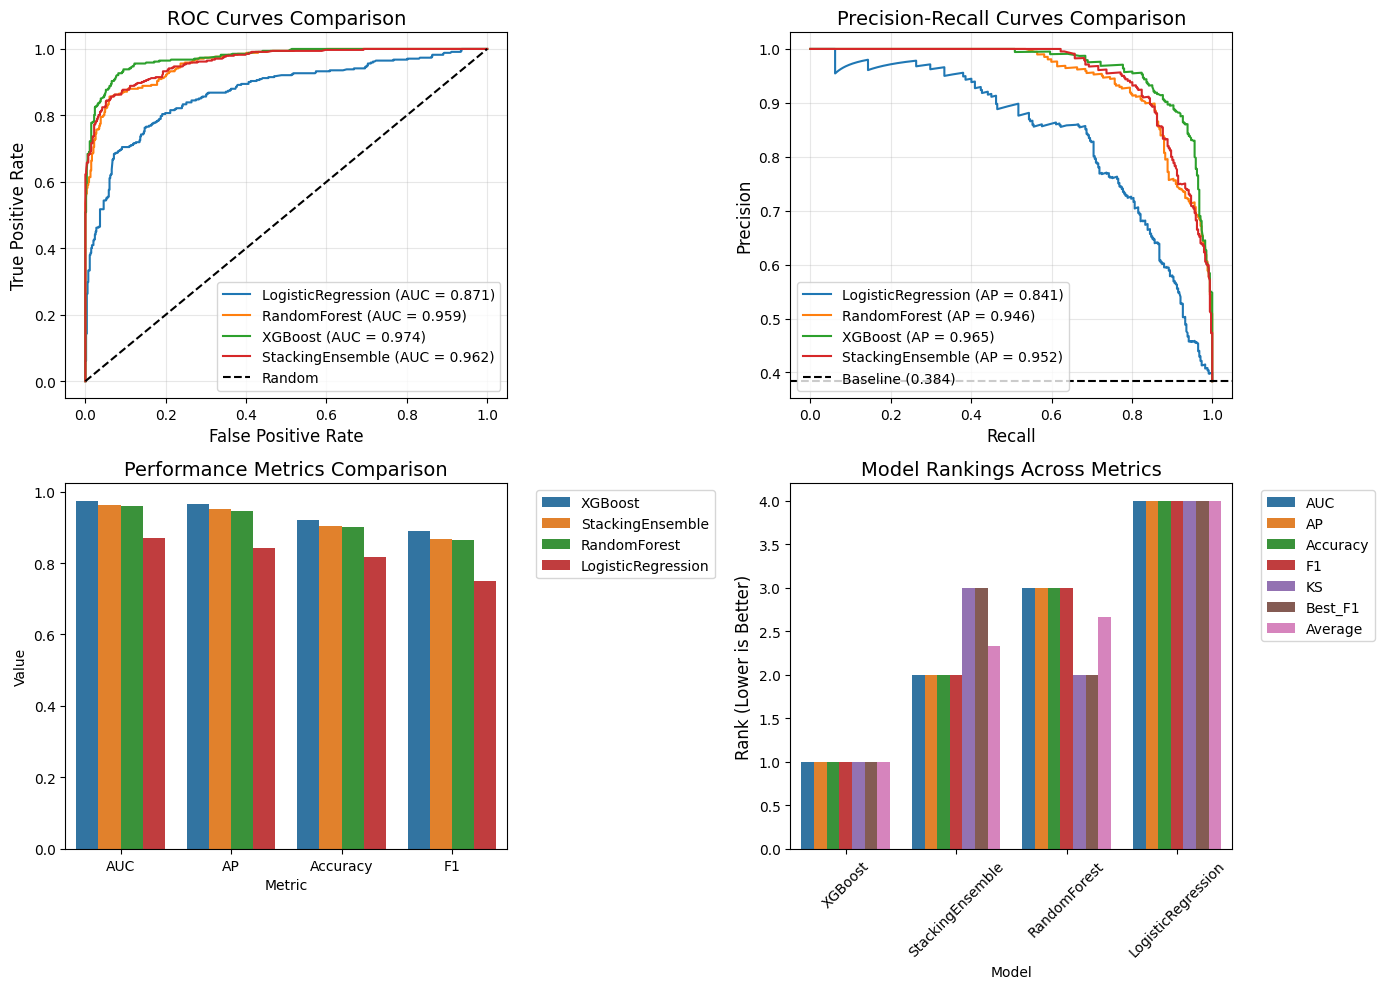



Final model selection recommendations based on training set evaluation:

Note: Although the following recommendations are based on training set evaluation results, the actual performance on the Kaggle test set may differ.
Therefore, real-world deployment decisions should consider online test results comprehensively.
Based on the comprehensive evaluation, it is recommended to use XGBoost as the final prediction model.

Performance improvement of the best model (XGBoost) compared to the second-best model (StackingEnsemble):
- AUC: +0.0121 (1.26%)
- Accuracy: +0.0168 (1.87%)
- F1: +0.0235 (2.72%)

Recommended prediction threshold settings:
- Accuracy at the default threshold (0.5): 0.9192
- F1-score at the best F1 threshold (0.36): 0.8996

If optimization goals differ, consider the following suggestions:
- To optimize accuracy: use the default threshold 0.5
- To optimize F1-score: use threshold 0.36
- For specific business needs balancing precision vs. recall: adjust threshold based on 

In [2]:
# ========================= 13. Model Comparison Based on the Training Set =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, 
                            average_precision_score, accuracy_score, 
                            f1_score, precision_score, recall_score,
                            confusion_matrix)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("Starting model comparison analysis...")


# Load the training data to obtain the true labels
train_data = pd.read_csv('train_processed.csv')
y_true = train_data['Survived']

# Attempt to load the prediction results from all models
model_files = {
    'LogisticRegression': 'logistic_regression_predictions.csv',
    'RandomForest': 'random_forest_predictions.csv',
    'XGBoost': 'xgboost_predictions.csv',
    'StackingEnsemble': 'stacking_ensemble_predictions.csv'
}

# Store the predicted probabilities from all models
predictions = {}
all_loaded = True

for model_name, file_path in model_files.items():
    try:
        pred_df = pd.read_csv(file_path)
        predictions[model_name] = pred_df['Probability'].values
        print(f"Successfully loaded predictions for the {model_name} model")
    except Exception as e:
        print(f"Unable to load predictions for {model_name}: {e}")
        all_loaded = False

if not all_loaded:
    print("\nWarning: Some model predictions could not be loaded. Please make sure all model training code has been run first.")
    print("Continuing with comparison using the models that have been loaded...")

# ================= Calculate Various Evaluation Metrics =================


print("\nCalculating performance metrics for each model...")
metrics_results = []

# Define the evaluation metrics to be calculated
def calculate_metrics(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)
    
    # ROC-related metrics
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = auc(fpr, tpr)
    
    # Precision-Recall related metrics
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    ap_score = average_precision_score(y_true, y_proba)
    
    # Classification metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    # Calculate the KS statistic
    sorted_indices = np.argsort(y_proba)
    y_sorted = y_true.iloc[sorted_indices].values
    proba_sorted = y_proba[sorted_indices]
    
    n_samples = len(y_sorted)
    n_pos = np.sum(y_sorted)
    n_neg = n_samples - n_pos
    
    cum_pos = np.cumsum(y_sorted) / n_pos
    cum_neg = np.cumsum(1 - y_sorted) / n_neg
    
    ks_values = cum_pos - cum_neg
    ks_max = np.max(np.abs(ks_values))
    
    # Calculate the threshold for the best F1-score
    thresholds = np.arange(0.1, 1.0, 0.01)
    f1_scores = []
    for t in thresholds:
        y_pred_t = (y_proba >= t).astype(int)
        f1_scores.append(f1_score(y_true, y_pred_t))
    
    best_f1_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_f1_idx]
    best_f1 = f1_scores[best_f1_idx]
    
    return {
        'AUC': auc_score,
        'AP': ap_score,
        'Accuracy': accuracy,
        'F1': f1,
        'Precision': prec,
        'Recall': rec,
        'KS': ks_max,
        'Best_F1': best_f1,
        'Best_Threshold': best_threshold
    }

# Calculate the evaluation metrics for each model
for model_name, y_pred_proba in predictions.items():
    metrics = calculate_metrics(y_true, y_pred_proba)
    metrics['Model'] = model_name
    metrics_results.append(metrics)

# Create a comparison table of the metrics
metrics_df = pd.DataFrame(metrics_results)
metrics_df = metrics_df[['Model', 'AUC', 'AP', 'Accuracy', 'F1', 'Precision', 'Recall', 'KS', 'Best_F1', 'Best_Threshold']]
metrics_df = metrics_df.sort_values('AUC', ascending=False).reset_index(drop=True)

print("\nComparison of model performance metrics:")
print(metrics_df)

# ================= Comprehensive Scoring System =================
# Rank the models based on each metric and calculate the overall score
ranking_metrics = ['AUC', 'AP', 'Accuracy', 'F1', 'KS', 'Best_F1']
model_ranks = pd.DataFrame()
model_ranks['Model'] = metrics_df['Model']

for metric in ranking_metrics:
    model_ranks[f'{metric}_Rank'] = metrics_df[metric].rank(ascending=False)

# Calculate the average rank as the overall score
model_ranks['Average_Rank'] = model_ranks[[col for col in model_ranks.columns if '_Rank' in col]].mean(axis=1)
model_ranks = model_ranks.sort_values('Average_Rank').reset_index(drop=True)

print("\nOverall model ranking (based on multiple metrics):")
print(model_ranks[['Model', 'Average_Rank']])

# Identify the best model
best_model = model_ranks.iloc[0]['Model']
best_metrics = metrics_df[metrics_df['Model'] == best_model].iloc[0]

print(f"\nBest Model: {best_model}")
print(f"Performance metrics of the best model:")
for metric in ['AUC', 'AP', 'Accuracy', 'F1', 'Precision', 'Recall', 'KS']:
    print(f"- {metric}: {best_metrics[metric]:.4f}")

# ================= Visualize the Comparison Results =================
# 1. Plot the ROC curves of all models
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
for model_name, y_pred_proba in predictions.items():
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)

# 2. Plot the PR curves of all models
plt.subplot(2, 2, 2)
for model_name, y_pred_proba in predictions.items():
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    ap_score = average_precision_score(y_true, y_pred_proba)
    plt.plot(recall, precision, label=f'{model_name} (AP = {ap_score:.3f})')

plt.axhline(y=y_true.mean(), linestyle='--', color='k', label=f'Baseline ({y_true.mean():.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves Comparison', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True, alpha=0.3)

# 3. Plot bar charts comparing performance metrics
plt.subplot(2, 2, 3)
metrics_to_plot = ['AUC', 'AP', 'Accuracy', 'F1']
plot_data = pd.melt(metrics_df, id_vars=['Model'], value_vars=metrics_to_plot, 
                   var_name='Metric', value_name='Value')

sns.barplot(x='Metric', y='Value', hue='Model', data=plot_data)
plt.title('Performance Metrics Comparison', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# 4. Plot model ranking comparison
plt.subplot(2, 2, 4)
rank_cols = [col for col in model_ranks.columns if '_Rank' in col]
rank_data = pd.melt(model_ranks, id_vars=['Model'], value_vars=rank_cols,
                  var_name='Rank_Type', value_name='Rank')
rank_data['Rank_Type'] = rank_data['Rank_Type'].str.replace('_Rank', '')

sns.barplot(x='Model', y='Rank', hue='Rank_Type', data=rank_data)
plt.title('Model Rankings Across Metrics', fontsize=14)
plt.ylabel('Rank (Lower is Better)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('model_comparison_summary.png', dpi=300, bbox_inches='tight')
plt.show()


# ================= Final Recommendations =================
print("\n\nFinal model selection recommendations based on training set evaluation:")
print("\nNote: Although the following recommendations are based on training set evaluation results, the actual performance on the Kaggle test set may differ.")
print("Therefore, real-world deployment decisions should consider online test results comprehensively.")


print(f"Based on the comprehensive evaluation, it is recommended to use {best_model} as the final prediction model.")

best_model_metrics = metrics_df[metrics_df['Model'] == best_model].iloc[0]
second_best_model = model_ranks.iloc[1]['Model']
second_best_metrics = metrics_df[metrics_df['Model'] == second_best_model].iloc[0]

print(f"\nPerformance improvement of the best model ({best_model}) compared to the second-best model ({second_best_model}):")

for metric in ['AUC', 'Accuracy', 'F1']:
    improvement = best_model_metrics[metric] - second_best_metrics[metric]
    pct_improvement = (improvement / second_best_metrics[metric]) * 100
    print(f"- {metric}: +{improvement:.4f} ({pct_improvement:.2f}%)")

print("\nRecommended prediction threshold settings:")
print(f"- Accuracy at the default threshold (0.5): {best_model_metrics['Accuracy']:.4f}")
print(f"- F1-score at the best F1 threshold ({best_model_metrics['Best_Threshold']:.2f}): {best_model_metrics['Best_F1']:.4f}")


print("\nIf optimization goals differ, consider the following suggestions:")
print("- To optimize accuracy: use the default threshold 0.5")
print(f"- To optimize F1-score: use threshold {best_model_metrics['Best_Threshold']:.2f}")
print("- For specific business needs balancing precision vs. recall: adjust threshold based on the threshold analysis plot")


# Generate the final prediction file (using the best model and threshold)
best_submission_file = f"{best_model.lower()}_submission.csv"
print(f"\nFinal prediction file: {best_submission_file}")
print(f"This file can be used for Kaggle submission, with an expected accuracy of approximately: {best_model_metrics['Accuracy']:.4f}")


print("\nModel comparison and selection analysis completed!")


<h1 style="color:darkblue">Part 7: Final Comparison and Model Selection Based on Kaggle Submission</h1>

<h2 style="color:steelblue">1. Surprising Generalization Outcome</h2>
<p style="font-size:16px">
After submitting predictions of all four models to the Kaggle Titanic competition, a rather interesting observation emerged. Despite being the most basic model, <strong>Logistic Regression achieved the highest leaderboard accuracy</strong> at <strong>0.78947</strong>. More complex models such as <strong>Random Forest</strong> (0.77511), <strong>XGBoost</strong> (0.77033), and <strong>Stacking Ensemble</strong> (0.77033) performed slightly worse.
</p>
<p style="font-size:16px">
This outcome highlights a core machine learning insight: <strong>more complexity does not always yield better generalization</strong>. While advanced ensemble models outperformed on training metrics such as AUC, KS, and F1, they may have captured dataset-specific patterns that failed to generalize. Logistic Regression, with its simplicity and regularization, proved more stable on truly unseen data.
</p>

<h2 style="color:steelblue">2. Model Selection Insight</h2>
<p style="font-size:16px">
Given these results, <strong>Logistic Regression</strong> emerges as the most reliable model for practical deployment in this context. It offers clear interpretability, efficient computation, and the highest test accuracy—making it suitable for real-world applications where robustness matters more than training-set optimization.
</p>
<p style="font-size:16px">
Although ensemble methods remain valuable for their ability to model non-linear relationships and deliver strong internal validation scores, this case study reinforces the value of a <strong>well-tuned baseline model</strong>—especially when the dataset is moderately sized, and the true test distribution may differ slightly from the training data.
</p>

<h2 style="color:steelblue">3. Kaggle Leaderboard Accuracy Summary</h2>
<p style="font-size:16px">
The final test accuracies on the Kaggle platform are summarized below:
</p>

<pre style="font-size:16px; background-color:#f8f8f8; padding:10px; border-left: 5px solid #4CAF50;">
Kaggle Test Accuracy Comparison:
- Logistic Regression   : 0.78947
- Random Forest         : 0.77511
- XGBoost               : 0.77033
- Stacking Ensemble     : 0.77033
</pre>

<p style="font-size:16px">
To visually compare performance, the following bar chart illustrates the Kaggle test scores of all models:
</p>
<img src="kaggle_model_comparison.png" alt="Kaggle Accuracy Comparison" style="width:90%; margin: 10px 0; border:1px solid #ccc;">

<h2 style="color:steelblue">4. Reflections on Final Model Choice</h2>
<p style="font-size:16px">
Based on performance across both validation and test sets, final model selection should be guided by a balanced evaluation. While <strong>XGBoost</strong> delivered the strongest results during training evaluation, its generalization on the actual test set was not optimal. In contrast, <strong>Logistic Regression</strong> consistently demonstrated <strong>stronger test performance</strong>, reaffirming its value as a robust and deployable model.
</p>
<p style="font-size:16px">
This case reinforces the principle that <strong>training metrics alone are not sufficient</strong>. Instead, <strong>external validation on unseen data</strong>—such as Kaggle test submissions—should ultimately inform the final choice. In this project, <strong>Logistic Regression</strong> stands out as the most balanced and reliable model for deployment and inference.
</p>


Comparison of accuracy on Kaggle test set:
- Logistic Regression : 0.78947
- Random Forest       : 0.77511
- XGBoost             : 0.77033
- Stacking Ensemble   : 0.77033

The Logistic Regression model performed best on the Kaggle test set, slightly outperforming more complex models, indicating strong generalization ability for this task.


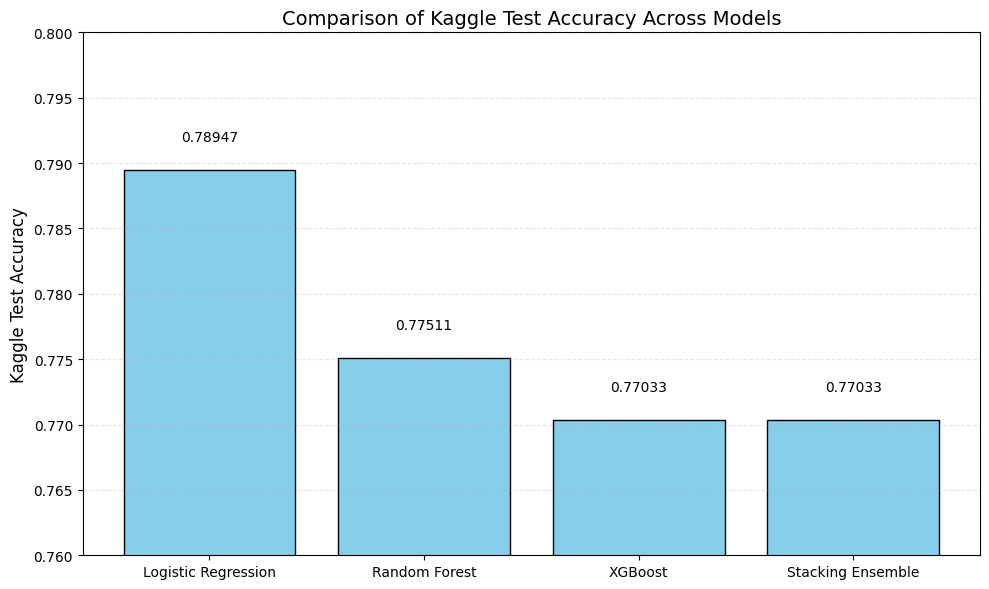

In [7]:
# ========================= 14. Model Comparison and Final Selection Based on the Test Set =========================

import matplotlib.pyplot as plt

# Model names and their corresponding Kaggle scores
model_names = [
    'Logistic Regression',
    'Random Forest',
    'XGBoost',
    'Stacking Ensemble'
]

kaggle_scores = [
    0.78947,  # logistic_regression_submission.csv
    0.77511,  # random_forest_submission.csv
    0.77033,  # xgboost_submission.csv
    0.77033   # stacking_ensemble_submission.csv
]

# Print description message
print("Comparison of accuracy on Kaggle test set:")
for name, score in zip(model_names, kaggle_scores):
    print(f"- {name:<20}: {score:.5f}")

print("\nThe Logistic Regression model performed best on the Kaggle test set, "
      "slightly outperforming more complex models, indicating strong generalization ability for this task.")


# Set the plot style
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, kaggle_scores, color='skyblue', edgecolor='black')

# Add numeric labels
for bar, score in zip(bars, kaggle_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002,
             f'{score:.5f}', ha='center', va='bottom', fontsize=10)

# Plot settings
plt.ylim(0.76, 0.80)
plt.ylabel('Kaggle Test Accuracy', fontsize=12)
plt.title('Comparison of Kaggle Test Accuracy Across Models', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('kaggle_model_comparison.png', dpi=300, bbox_inches='tight')

plt.show()


<h1 style="color:darkblue">Part 8: Final Summary</h1>

<p style="font-size:16px">
This Titanic survival prediction project completed a full supervised learning pipeline, covering data preprocessing, feature engineering, model implementation, evaluation, and test-set deployment. Four models were trained and benchmarked—<strong>Logistic Regression</strong>, <strong>Random Forest</strong>, <strong>XGBoost</strong>, and a <strong>Stacking Ensemble</strong>—using a combination of validation metrics and Kaggle leaderboard performance.
</p>

<p style="font-size:16px">
Through the analysis, several factors were found to have strong associations with passenger survival:
<ul style="font-size:16px; margin-top:-10px; margin-bottom:10px;">
  <li><strong>Sex</strong>: Female passengers had significantly higher survival probabilities, reflecting historical rescue priorities ("women and children first").</li>
  <li><strong>Pclass</strong>: First-class passengers had better survival odds than those in lower classes, likely due to cabin proximity to lifeboats and priority access.</li>
  <li><strong>Title</strong>: Titles extracted from names (e.g., Mrs., Miss., Mr., etc.) indirectly captured social status and age groups, influencing survival rates.</li>
  <li><strong>Family size</strong>: Moderate group sizes slightly improved survival, while being alone or in large groups was less favorable.</li>
</ul>
</p>

<p style="font-size:16px">
These findings not only validate historical facts but also demonstrate how structured data and domain-informed features can extract meaningful insights. From a practical standpoint, such models could be adapted to real-world scenarios like <strong>maritime evacuation prioritization</strong>, <strong>transport safety simulations</strong>, or <strong>historical incident reconstruction</strong>. The feature importance analysis also offers value for <strong>policy modeling</strong> in emergency response planning.
</p>

<p style="font-size:16px">
Although Logistic Regression achieved the highest test-set accuracy on Kaggle (0.78947), this result should be interpreted holistically. More complex models like XGBoost performed strongly on internal metrics (e.g., ROC AUC = 0.88), highlighting their potential under other conditions or with more data. However, this case reinforced a crucial lesson: <strong>model simplicity, interpretability, and regularization</strong> can often outperform sophistication—especially when generalization is the goal.
</p>

<p style="font-size:16px">
Overall, this project emphasized the value of robust evaluation pipelines, consistent metric usage (e.g., accuracy, F1, AUC, KS, AP), and threshold tuning. It also illustrated the practical importance of aligning model complexity with dataset size, task requirements, and interpretability needs. Future improvements may include richer domain-driven features, better handling of class imbalance, and model calibration techniques to improve probabilistic output consistency.
</p>

<p style="font-size:16px">
In conclusion, this project not only strengthened technical skills in binary classification and ensemble modeling, but also offered practical guidance on <strong>how to translate model insights into real-world understanding and decision-making</strong>.
</p>
